<a href="https://colab.research.google.com/github/MOREDataset/IceFeature_Forecasting/blob/main/ArcticIceSea_Forecasting_EXPIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **START**

In [7]:
# **************** UNCOMMENT AND RUN THIS CELL IF YOU NEED TO INSTALL/ UPGRADE TSAI ****************
stable = True # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} >> /dev/null
from tsai.all import *
computer_setup()

os             : Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
python         : 3.7.13
tsai           : 0.3.1
fastai         : 2.7.7
fastcore       : 1.5.13
torch          : 1.11.0+cu102
device         : 1 gpu (['Tesla P100-PCIE-16GB'])
cpu cores      : 4
RAM            : 25.46 GB
GPU memory     : [15.9] GB


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


 # **CONFIGURATION**

In [18]:
# CONFIGURATION
model_name  = LSTMPlus#
par = {}#'levels':4, 'base_arch': InceptionTimePlus}#,  'wavelet': 'db4'}#, 'base_arch':InceptionTime'}#'hidden_size':[100, 50], 'n_layers':2}#{'levels':4}, 'wavelet': None, 'base_arch': InceptionTimePlus}#,  'wavelet': 'db4'}#, 'base_arch':InceptionTime}
freeze_epoch = 25
hrz = '7d'
season1 = 'FallWinter'
season2 = 'SpringSummer'
strategy = '_S2'

In [ ]:
stable = True # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} >> /dev/null
!pip install optuna -U >> /dev/null
from tsai.all import *
import optuna
my_setup(optuna)
set_seed(42, False)

os             : Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
python         : 3.7.13
tsai           : 0.3.1
fastai         : 2.7.7
fastcore       : 1.5.13
optuna         : 2.10.1
torch          : 1.11.0+cu102
device         : 1 gpu (['Tesla P100-PCIE-16GB'])
cpu cores      : 4
RAM            : 25.46 GB
GPU memory     : [15.9] GB


# Thickness forecasting next week

In [47]:
K_FallWinter = 15
K_SpringSummer = 31

## season1

In [48]:
season = season1
IMFS_count = K_FallWinter
if hrz == '7d':
  exec('n_layers = 3')
  exec('bias = True')
  exec('rnn_dropout = 0.349762411800935')
  exec('bidirectional = True')
  exec('fc_dropout = 0.0699199708942447')
  exec('bn = False')
  exec('learning_rate = 0.00477257896567688')
elif hrz == '1m':
  exec('n_layers = 5')
  exec('bias = True')
  exec('rnn_dropout = 0.0261758253489527')
  exec('bidirectional = False')
  exec('fc_dropout = 0.347113526814007')
  exec('bn = False')
  exec('learning_rate = 0.00989048675114461')

par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

### All-in-one strategy

In [49]:
ind = str(IMFS_count) + 'IMFs' #change this!!

mode = 'ThickTime_'
Thick = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Thicksequences_' + season + '.csv',header=None)
VMD_Thick = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Thicksequences_' + ind + '_' + season + '.csv')
VMD_Thick = VMD_Thick.drop(columns='Element0')
Thick

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.951,1.955,1.962,1.965,1.973,1.981,1.986,1.984,1.977,1.974,...,2.035,2.038,2.039,2.046,2.050,2.054,2.058,2.061,2.066,2.069
1,1.955,1.962,1.965,1.973,1.981,1.986,1.984,1.977,1.974,1.974,...,2.038,2.039,2.046,2.050,2.054,2.058,2.061,2.066,2.069,2.071
2,1.962,1.965,1.973,1.981,1.986,1.984,1.977,1.974,1.974,1.977,...,2.039,2.046,2.050,2.054,2.058,2.061,2.066,2.069,2.071,2.065
3,1.965,1.973,1.981,1.986,1.984,1.977,1.974,1.974,1.977,1.984,...,2.046,2.050,2.054,2.058,2.061,2.066,2.069,2.071,2.065,2.064
4,1.973,1.981,1.986,1.984,1.977,1.974,1.974,1.977,1.984,1.987,...,2.050,2.054,2.058,2.061,2.066,2.069,2.071,2.065,2.064,2.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931,1.503,1.507,1.513,1.519,1.526,1.528,1.539,1.547,1.551,1.556,...,1.646,1.648,1.647,1.653,1.653,1.656,1.660,1.665,1.666,1.672
5932,1.507,1.513,1.519,1.526,1.528,1.539,1.547,1.551,1.556,1.559,...,1.648,1.647,1.653,1.653,1.656,1.660,1.665,1.666,1.672,1.676
5933,1.513,1.519,1.526,1.528,1.539,1.547,1.551,1.556,1.559,1.563,...,1.647,1.653,1.653,1.656,1.660,1.665,1.666,1.672,1.676,1.681
5934,1.519,1.526,1.528,1.539,1.547,1.551,1.556,1.559,1.563,1.566,...,1.653,1.653,1.656,1.660,1.665,1.666,1.672,1.676,1.681,1.687


In [50]:
exec('n_layers = 3')
exec('bias = True')
exec('rnn_dropout = 0.349762411800935')
exec('bidirectional = True')
exec('fc_dropout = 0.0699199708942447')
exec('bn = False')
exec('learning_rate = 0.00477257896567688')

par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

Processing Thickness data..
splitting data..
-IMF 0 , splitting data..
-IMF 1 , splitting data..
-IMF 2 , splitting data..
-IMF 3 , splitting data..
-IMF 4 , splitting data..
-IMF 5 , splitting data..
-IMF 6 , splitting data..
-IMF 7 , splitting data..
-IMF 8 , splitting data..
-IMF 9 , splitting data..
-IMF 10 , splitting data..
-IMF 11 , splitting data..
-IMF 12 , splitting data..
-IMF 13 , splitting data..
-IMF 14 , splitting data..
-IMF 15 , splitting data..
Standardizing data..
training set:  (4749, 19, 30) (4749, 7) , testing set:  (1187, 19, 30) (1187, 7)


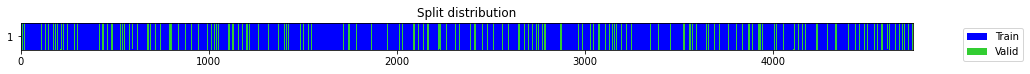

In [52]:
split_indx = 30

print('Processing Thickness data..')

def get_day(x):
    return x.day
def get_month(x):
    return x.month    
def get_year(x):
    return x.year    
# def get_ismonthstart(x):
#     return x.is_month_start

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['Signal']
row = ["feature{}".format(x) for x in np.array(range(IMFS_count+4))] #Change this number to higher if necessary!
scalersIN = pd.DataFrame([], columns = col, index = row)
scalersOUT = pd.DataFrame([], columns = col, index = [0])
from sklearn.preprocessing import OrdinalEncoder
#read TS data as datetime
TS =  pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_TSsequences_' + season + '.csv',header=None)
cols = TS.columns[:]
TS[cols] = TS[cols].apply(pd.to_datetime, errors='coerce')
TS_data = TS.iloc[:,:] # Train set 
TS_D = TS_data.applymap(get_day)
TS_Y = TS_data.applymap(get_year)
TS_M = TS_data.applymap(get_month)
# TS_Mstart = TS_data.applymap(get_ismonthstart)

# define ordinal encoding
encoder_H = OrdinalEncoder()
encoder_D = OrdinalEncoder()
encoder_month = OrdinalEncoder()
# encoder_monthstart = OrdinalEncoder()
# transform data
TS_D = to3d(encoder_H.fit_transform(TS_D))
TS_Y = to3d(encoder_D.fit_transform(TS_Y))
TS_M = to3d(encoder_month.fit_transform(TS_M))
# TS_Mstart = to3d(encoder_monthstart.fit_transform(TS_Mstart))

test_targetdata={}
test_predsdata={}

test_targetdata={}
test_predsdata={}

print('splitting data..')
for x in range(IMFS_count+1):   #Initialize
  exec('temp' + str(x) + ' = np.zeros((Thick.shape[0],Thick.shape[1]))')

for x in range(0,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  print('-IMF',x,', splitting data..')
  exec('temp' + str(x) + ' = to3d(VMD_Thick.iloc[x::IMFS_count+1,:].values)')

Thick_data_allIMFs = temp0
for x in range(1,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  exec('Thick_data_allIMFs = np.concatenate((temp' + str(x) + ', Thick_data_allIMFs), axis=1)')

# Temp_data = to3d(Temp.iloc[:,:].values)
data = np.concatenate([Thick_data_allIMFs, TS_D, TS_Y, TS_M],axis=1)  #, TS_Mend, TS_Mstart
data_X = data[:,:,:split_indx]
data_y = Thick.iloc[:,split_indx:]
X_train, X_test = data_X[:TS.shape[0]-int(TS.shape[0]*20/100)], data_X[-int(TS.shape[0]*20/100):]
y_train, y_test = data_y[:TS.shape[0]-int(TS.shape[0]*20/100)], data_y[-int(TS.shape[0]*20/100):]
print('Standardizing data..')
for i in range(X_train.shape[1]): #normalize IN data
  scalersIN['Signal']["feature{}".format(i)] = StandardScaler()
  X_train[:, i, :] = scalersIN['Signal']["feature{}".format(i)].fit_transform(X_train[:, i, :])    
scalersOUT['Signal'] = StandardScaler() #normalize OUT data
y_train = scalersOUT['Signal'][0].fit_transform(y_train)  
print('training set: ',X_train.shape, y_train.shape, ', testing set: ',X_test.shape, y_test.shape)

splits = get_splits(y_train, valid_size=.2, stratify=False, random_state=42, shuffle=True)
tfms  = [None, [ToFloat(), ToNumpyTensor()]]
dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128])    
#**************#**************#**************#**************#**************#**************#**************#**************

#### Model learning

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.711157,0.185869,0.319727,0.431126,00:00
1,0.443652,0.148693,0.290390,0.385607,00:00
2,0.319650,0.019962,0.106566,0.141287,00:00
3,0.237171,0.015695,0.091306,0.125280,00:00
4,0.181452,0.014841,0.100685,0.121825,00:00
5,0.142374,0.008808,0.077607,0.093850,00:00
6,0.113750,0.002938,0.040768,0.054199,00:00
7,0.092271,0.002432,0.036424,0.049316,00:00
8,0.075902,0.001426,0.027920,0.037765,00:00
9,0.063110,0.003469,0.049275,0.058900,00:00


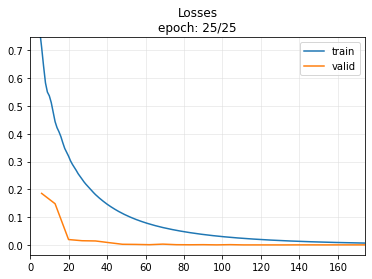

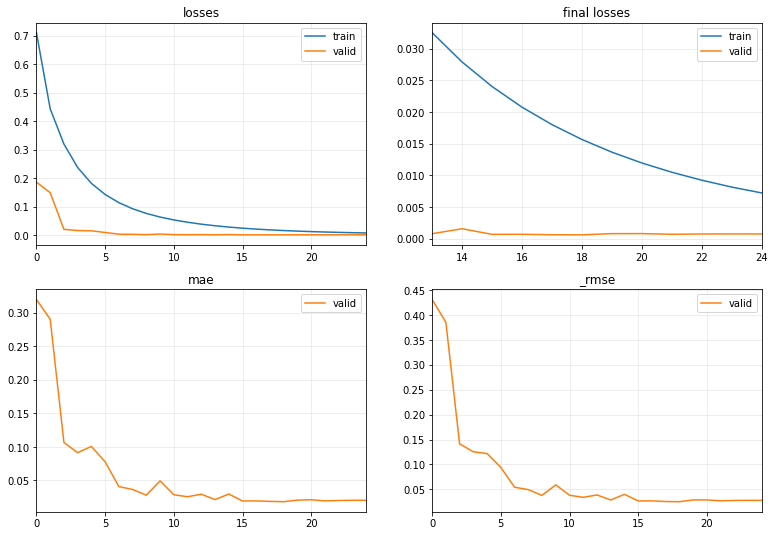

Targets and Predictions shapes (1187, 7) (1187, 7)
LSTMPlus : MAPE =  0.5770405931743061 MAE =  0.007103308354953722 RMSE =  0.011009097811703448


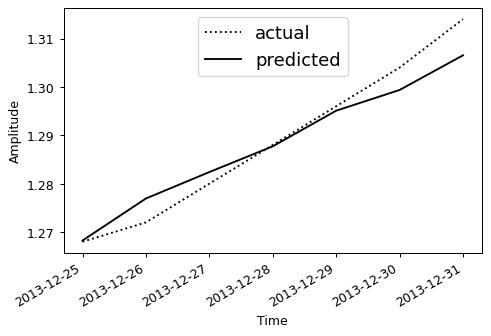

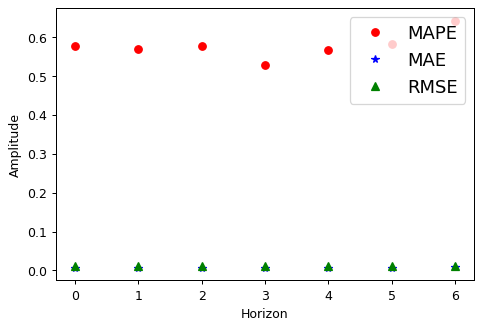

In [53]:
#Model learning
learn = TSForecaster(X_train, y_train, splits=splits, tfms=tfms, bs=512, arch=model_name, arch_config=par, metrics=[mae, rmse], cbs=[ShowGraph(),SaveModel()])
learn.fit_one_cycle(freeze_epoch, learning_rate)
# #save trained model
# learn.save_all(path='/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export', dls_fname='dls', model_fname='WP_TIME_multistep_' + learn.model.__class__.__name__ + '_' + HOUSE, learner_fname='learner')
valid_dl = dls.valid

# Labeled test data
for i in range(X_test.shape[1]): #normalize IN data
  X_test[:, i, :] = scalersIN['Signal']["feature{}".format(i)].transform(X_test[:, i, :])    
y_test = scalersOUT['Signal'][0].transform(y_test)  
test_ds = valid_dl.dataset.add_test(X_test, y_test)
test_dl = valid_dl.new(test_ds)
_, temp_targets, temp_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
#denormalize data
test_predsdata = scalersOUT['Signal'][0].inverse_transform(temp_preds)  
test_targetdata = scalersOUT['Signal'][0].inverse_transform(temp_targets)    
del temp_targets, temp_preds
# RMSE.append(rmse(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# MAE.append(mae(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# print(f'RMSE: {RMSE[x]:10.6f}, MAE: {MAE[x]:10.6f}')
d = pd.DataFrame([])
d = test_targetdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_targetdata_THICKF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', d, delimiter=',')
dp = pd.DataFrame([])
dp = test_predsdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_predsdata_THICKF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', dp, delimiter=',')

#TEST MODEL
import numpy as np
import matplotlib.pyplot as plt
print('Targets and Predictions shapes', d.shape, dp.shape)

MAPE = []
MAE  = []
RMSE = []
for i in range(d.shape[1]): 
  MAPE.append(np.mean(np.abs((d[:,i] - dp[:,i]) / d[:,i]))*100)
  MAE.append(np.mean(np.abs((d[:,i] - dp[:,i]))))
  RMSE.append(np.sqrt(np.mean((d[:,i] - dp[:,i])**2)))
print(learn.model.__class__.__name__,': MAPE = ',np.mean(MAPE), 'MAE = ',np.mean(MAE), 'RMSE = ',np.mean(RMSE))

# Create plots with pre-defined labels.
fig, ax = plt.subplots(dpi = 90)
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], d[0][:], 'k:', label='actual')
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], dp[0][:], 'k-', label='predicted')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper center',fontsize='x-large')

plt.show()

# Create plots with pre-defined labels.
fig_step, ax_step = plt.subplots(dpi = 90)
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAPE, 'ro', label='MAPE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAE, 'b*', label='MAE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),RMSE, 'g^', label='RMSE')
plt.ylabel('Amplitude')
plt.xlabel('Horizon')
legend = ax_step.legend(loc='upper right',fontsize='x-large')

plt.show()


## season2

In [54]:
season = season2
IMFS_count = K_SpringSummer
if hrz == '7d':
  exec('n_layers = 3')
  exec('bias = True')
  exec('rnn_dropout = 0.206020497557491')
  exec('bidirectional = True')
  exec('fc_dropout = 0.25930529437731')
  exec('bn = True')
  exec('learning_rate = 0.00643004520621305')
elif hrz == '1m':
  exec('n_layers = 5')
  exec('bias = True')
  exec('rnn_dropout = 0.0997489621828708')
  exec('bidirectional = True')
  exec('fc_dropout = 0.343024842102137')
  exec('bn = True')
  exec('learning_rate = 0.00383757639464114')
par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

### All-in-one strategy

In [55]:
ind = str(IMFS_count) + 'IMFs' #change this!!
mode = 'ThickTime_'

Thick = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Thicksequences_' + season + '.csv',header=None)
VMD_Thick = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Thicksequences_' + ind + '_' + season + '.csv')
VMD_Thick = VMD_Thick.drop(columns='Element0')
Thick

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,2.223,2.234,2.244,2.256,2.263,2.271,2.277,2.279,2.282,2.291,...,2.394,2.401,2.402,2.407,2.413,2.422,2.424,2.432,2.440,2.444
1,2.234,2.244,2.256,2.263,2.271,2.277,2.279,2.282,2.291,2.295,...,2.401,2.402,2.407,2.413,2.422,2.424,2.432,2.440,2.444,2.452
2,2.244,2.256,2.263,2.271,2.277,2.279,2.282,2.291,2.295,2.302,...,2.402,2.407,2.413,2.422,2.424,2.432,2.440,2.444,2.452,2.458
3,2.256,2.263,2.271,2.277,2.279,2.282,2.291,2.295,2.302,2.305,...,2.407,2.413,2.422,2.424,2.432,2.440,2.444,2.452,2.458,2.461
4,2.263,2.271,2.277,2.279,2.282,2.291,2.295,2.302,2.305,2.308,...,2.413,2.422,2.424,2.432,2.440,2.444,2.452,2.458,2.461,2.465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,1.791,1.788,1.789,1.785,1.781,1.776,1.769,1.762,1.759,1.754,...,1.635,1.633,1.622,1.612,1.605,1.601,1.593,1.582,1.568,1.553
6812,1.788,1.789,1.785,1.781,1.776,1.769,1.762,1.759,1.754,1.746,...,1.633,1.622,1.612,1.605,1.601,1.593,1.582,1.568,1.553,1.536
6813,1.789,1.785,1.781,1.776,1.769,1.762,1.759,1.754,1.746,1.739,...,1.622,1.612,1.605,1.601,1.593,1.582,1.568,1.553,1.536,1.513
6814,1.785,1.781,1.776,1.769,1.762,1.759,1.754,1.746,1.739,1.730,...,1.612,1.605,1.601,1.593,1.582,1.568,1.553,1.536,1.513,1.501


In [56]:
exec('n_layers = 3')
exec('bias = True')
exec('rnn_dropout = 0.206020497557491')
exec('bidirectional = True')
exec('fc_dropout = 0.25930529437731')
exec('bn = True')
exec('learning_rate = 0.00643004520621305')

par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

Processing Thickness data..
splitting data..
-IMF 0 , splitting data..
-IMF 1 , splitting data..
-IMF 2 , splitting data..
-IMF 3 , splitting data..
-IMF 4 , splitting data..
-IMF 5 , splitting data..
-IMF 6 , splitting data..
-IMF 7 , splitting data..
-IMF 8 , splitting data..
-IMF 9 , splitting data..
-IMF 10 , splitting data..
-IMF 11 , splitting data..
-IMF 12 , splitting data..
-IMF 13 , splitting data..
-IMF 14 , splitting data..
-IMF 15 , splitting data..
-IMF 16 , splitting data..
-IMF 17 , splitting data..
-IMF 18 , splitting data..
-IMF 19 , splitting data..
-IMF 20 , splitting data..
-IMF 21 , splitting data..
-IMF 22 , splitting data..
-IMF 23 , splitting data..
-IMF 24 , splitting data..
-IMF 25 , splitting data..
-IMF 26 , splitting data..
-IMF 27 , splitting data..
-IMF 28 , splitting data..
-IMF 29 , splitting data..
-IMF 30 , splitting data..
-IMF 31 , splitting data..
Standardizing data..
training set:  (5453, 35, 30) (5453, 7) , testing set:  (1363, 35, 30) (1363, 7)

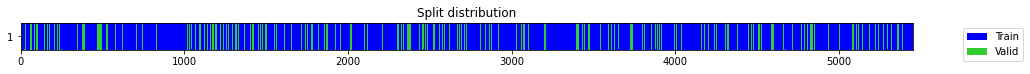

In [57]:
split_indx = 30

print('Processing Thickness data..')

def get_day(x):
    return x.day
def get_month(x):
    return x.month    
def get_year(x):
    return x.year    
# def get_ismonthstart(x):
#     return x.is_month_start

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['Signal']
row = ["feature{}".format(x) for x in np.array(range(IMFS_count+4))] #Change this number to higher if necessary!
scalersIN = pd.DataFrame([], columns = col, index = row)
scalersOUT = pd.DataFrame([], columns = col, index = [0])
from sklearn.preprocessing import OrdinalEncoder
#read TS data as datetime
TS =  pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_TSsequences_' + season + '.csv',header=None)
cols = TS.columns[:]
TS[cols] = TS[cols].apply(pd.to_datetime, errors='coerce')
TS_data = TS.iloc[:,:] # Train set 
TS_D = TS_data.applymap(get_day)
TS_Y = TS_data.applymap(get_year)
TS_M = TS_data.applymap(get_month)
# TS_Mstart = TS_data.applymap(get_ismonthstart)

# define ordinal encoding
encoder_H = OrdinalEncoder()
encoder_D = OrdinalEncoder()
encoder_month = OrdinalEncoder()
# encoder_monthstart = OrdinalEncoder()
# transform data
TS_D = to3d(encoder_H.fit_transform(TS_D))
TS_Y = to3d(encoder_D.fit_transform(TS_Y))
TS_M = to3d(encoder_month.fit_transform(TS_M))
# TS_Mstart = to3d(encoder_monthstart.fit_transform(TS_Mstart))

test_targetdata={}
test_predsdata={}

test_targetdata={}
test_predsdata={}

print('splitting data..')
for x in range(IMFS_count+1):   #Initialize
  exec('temp' + str(x) + ' = np.zeros((Thick.shape[0],Thick.shape[1]))')

for x in range(0,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  print('-IMF',x,', splitting data..')
  exec('temp' + str(x) + ' = to3d(VMD_Thick.iloc[x::IMFS_count+1,:].values)')

Thick_data_allIMFs = temp0
for x in range(1,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  exec('Thick_data_allIMFs = np.concatenate((temp' + str(x) + ', Thick_data_allIMFs), axis=1)')

# Temp_data = to3d(Temp.iloc[:,:].values)
data = np.concatenate([Thick_data_allIMFs, TS_D, TS_Y, TS_M],axis=1)  #, TS_Mend, TS_Mstart
data_X = data[:,:,:split_indx]
data_y = Thick.iloc[:,split_indx:]
X_train, X_test = data_X[:TS.shape[0]-int(TS.shape[0]*20/100)], data_X[-int(TS.shape[0]*20/100):]
y_train, y_test = data_y[:TS.shape[0]-int(TS.shape[0]*20/100)], data_y[-int(TS.shape[0]*20/100):]
print('Standardizing data..')
for i in range(X_train.shape[1]): #normalize IN data
  scalersIN['Signal']["feature{}".format(i)] = StandardScaler()
  X_train[:, i, :] = scalersIN['Signal']["feature{}".format(i)].fit_transform(X_train[:, i, :])    
scalersOUT['Signal'] = StandardScaler() #normalize OUT data
y_train = scalersOUT['Signal'][0].fit_transform(y_train)  
print('training set: ',X_train.shape, y_train.shape, ', testing set: ',X_test.shape, y_test.shape)

splits = get_splits(y_train, valid_size=.2, stratify=False, random_state=42, shuffle=True)
tfms  = [None, [ToFloat(), ToNumpyTensor()]]
dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128])    
#**************#**************#**************#**************#**************#**************#**************#**************

#### Model learning

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.579416,0.178877,0.340060,0.422938,00:00
1,0.371925,0.145479,0.292860,0.381417,00:00
2,0.258447,0.054054,0.184074,0.232496,00:00
3,0.189683,0.034764,0.145593,0.186452,00:00
4,0.142890,0.013928,0.085235,0.118015,00:00
5,0.110457,0.005456,0.050375,0.073865,00:00
6,0.087181,0.004568,0.047705,0.067588,00:00
7,0.069810,0.003140,0.035266,0.056040,00:00
8,0.056576,0.002497,0.032060,0.049972,00:00
9,0.046337,0.002691,0.030326,0.051871,00:00


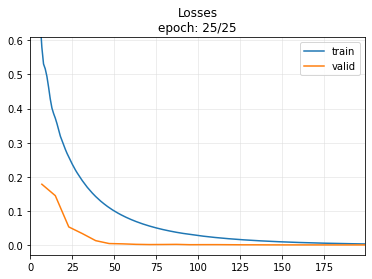

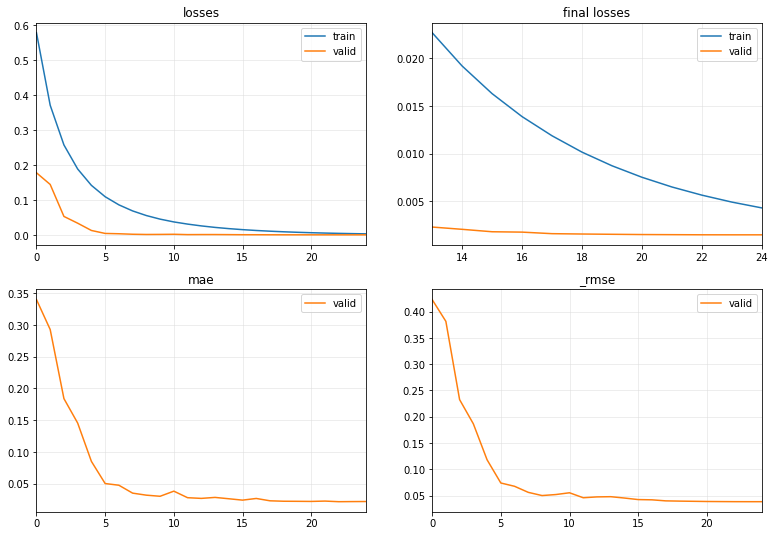

Targets and Predictions shapes (1363, 7) (1363, 7)
LSTMPlus : MAPE =  1.4532450531083725 MAE =  0.019205463257982742 RMSE =  0.04473783626718349


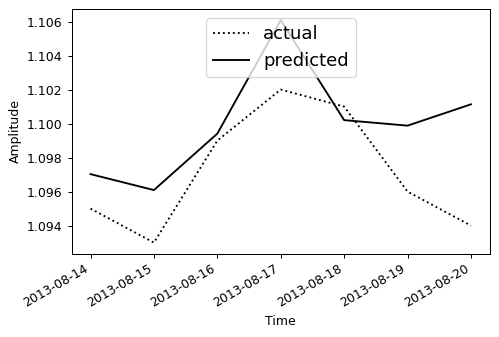

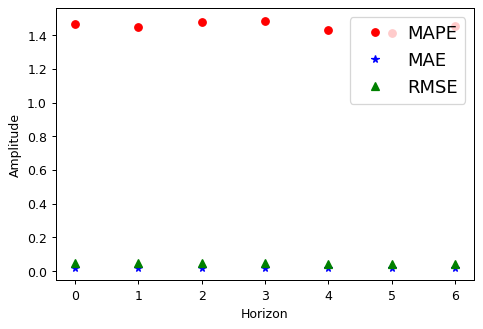

In [58]:
#Model learning
learn = TSForecaster(X_train, y_train, splits=splits, tfms=tfms, bs=512, arch=model_name, arch_config=par, metrics=[mae, rmse], cbs=[ShowGraph(),SaveModel()])
learn.fit_one_cycle(freeze_epoch, learning_rate)
# #save trained model
# learn.save_all(path='/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export', dls_fname='dls', model_fname='WP_TIME_multistep_' + learn.model.__class__.__name__ + '_' + HOUSE, learner_fname='learner')
valid_dl = dls.valid

# Labeled test data
for i in range(X_test.shape[1]): #normalize IN data
  X_test[:, i, :] = scalersIN['Signal']["feature{}".format(i)].transform(X_test[:, i, :])    
y_test = scalersOUT['Signal'][0].transform(y_test)  
test_ds = valid_dl.dataset.add_test(X_test, y_test)
test_dl = valid_dl.new(test_ds)
_, temp_targets, temp_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
#denormalize data
test_predsdata = scalersOUT['Signal'][0].inverse_transform(temp_preds)  
test_targetdata = scalersOUT['Signal'][0].inverse_transform(temp_targets)    
del temp_targets, temp_preds
# RMSE.append(rmse(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# MAE.append(mae(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# print(f'RMSE: {RMSE[x]:10.6f}, MAE: {MAE[x]:10.6f}')
d = pd.DataFrame([])
d = test_targetdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_targetdata_THICKF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', d, delimiter=',')
dp = pd.DataFrame([])
dp = test_predsdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_predsdata_THICKF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', dp, delimiter=',')

#TEST MODEL
import numpy as np
import matplotlib.pyplot as plt
print('Targets and Predictions shapes', d.shape, dp.shape)

MAPE = []
MAE  = []
RMSE = []
for i in range(d.shape[1]): 
  MAPE.append(np.mean(np.abs((d[:,i] - dp[:,i]) / d[:,i]))*100)
  MAE.append(np.mean(np.abs((d[:,i] - dp[:,i]))))
  RMSE.append(np.sqrt(np.mean((d[:,i] - dp[:,i])**2)))
print(learn.model.__class__.__name__,': MAPE = ',np.mean(MAPE), 'MAE = ',np.mean(MAE), 'RMSE = ',np.mean(RMSE))

# Create plots with pre-defined labels.
fig, ax = plt.subplots(dpi = 90)
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], d[0][:], 'k:', label='actual')
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], dp[0][:], 'k-', label='predicted')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper center',fontsize='x-large')

plt.show()

# Create plots with pre-defined labels.
fig_step, ax_step = plt.subplots(dpi = 90)
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAPE, 'ro', label='MAPE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAE, 'b*', label='MAE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),RMSE, 'g^', label='RMSE')
plt.ylabel('Amplitude')
plt.xlabel('Horizon')
legend = ax_step.legend(loc='upper right',fontsize='x-large')

plt.show()


# Volume forecasting next week

In [59]:
K_FallWinter = 39
K_SpringSummer = 15

## season1

In [60]:
season = season1
IMFS_count = K_FallWinter
if hrz == '7d':
  exec('n_layers = 5')
  exec('bias = True')
  exec('rnn_dropout = 0.0709853745722906')
  exec('bidirectional = True')
  exec('fc_dropout = 0.183655043366851')
  exec('bn = True')
  exec('learning_rate = 0.00249451151026499')
elif hrz == '1m':
  exec('n_layers = 8')
  exec('bias = True')
  exec('rnn_dropout = 0.243785095463468')
  exec('bidirectional = True')
  exec('fc_dropout = 0.226997243743688')
  exec('bn = True')
  exec('learning_rate = 0.00276596698031506')
par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

### All-in-one strategy

In [61]:
ind = str(IMFS_count) + 'IMFs' #change this!!
mode = 'VolTime_'
Vol = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Volsequences_' + season + '.csv',header=None)
VMD_Vol = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Volsequences_' + ind + '_' + season + '.csv')
VMD_Vol = VMD_Vol.drop(columns='Element0')
Vol

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,26.405,26.496,26.582,26.672,26.770,26.867,26.940,27.013,27.095,27.185,...,28.828,28.921,29.009,29.091,29.190,29.248,29.324,29.418,29.505,29.594
1,26.496,26.582,26.672,26.770,26.867,26.940,27.013,27.095,27.185,27.286,...,28.921,29.009,29.091,29.190,29.248,29.324,29.418,29.505,29.594,29.671
2,26.582,26.672,26.770,26.867,26.940,27.013,27.095,27.185,27.286,27.381,...,29.009,29.091,29.190,29.248,29.324,29.418,29.505,29.594,29.671,29.744
3,26.672,26.770,26.867,26.940,27.013,27.095,27.185,27.286,27.381,27.463,...,29.091,29.190,29.248,29.324,29.418,29.505,29.594,29.671,29.744,29.822
4,26.770,26.867,26.940,27.013,27.095,27.185,27.286,27.381,27.463,27.552,...,29.190,29.248,29.324,29.418,29.505,29.594,29.671,29.744,29.822,29.911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931,20.223,20.325,20.424,20.515,20.595,20.679,20.740,20.798,20.824,20.882,...,21.798,21.866,21.914,21.981,22.045,22.097,22.152,22.235,22.312,22.348
5932,20.325,20.424,20.515,20.595,20.679,20.740,20.798,20.824,20.882,20.963,...,21.866,21.914,21.981,22.045,22.097,22.152,22.235,22.312,22.348,22.398
5933,20.424,20.515,20.595,20.679,20.740,20.798,20.824,20.882,20.963,21.039,...,21.914,21.981,22.045,22.097,22.152,22.235,22.312,22.348,22.398,22.441
5934,20.515,20.595,20.679,20.740,20.798,20.824,20.882,20.963,21.039,21.117,...,21.981,22.045,22.097,22.152,22.235,22.312,22.348,22.398,22.441,22.489


In [62]:
exec('n_layers = 5')
exec('bias = True')
exec('rnn_dropout = 0.0709853745722906')
exec('bidirectional = True')
exec('fc_dropout = 0.183655043366851')
exec('bn = True')
exec('learning_rate = 0.00249451151026499')

par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

Processing Volume data..
splitting data..
-IMF 0 , splitting data..
-IMF 1 , splitting data..
-IMF 2 , splitting data..
-IMF 3 , splitting data..
-IMF 4 , splitting data..
-IMF 5 , splitting data..
-IMF 6 , splitting data..
-IMF 7 , splitting data..
-IMF 8 , splitting data..
-IMF 9 , splitting data..
-IMF 10 , splitting data..
-IMF 11 , splitting data..
-IMF 12 , splitting data..
-IMF 13 , splitting data..
-IMF 14 , splitting data..
-IMF 15 , splitting data..
-IMF 16 , splitting data..
-IMF 17 , splitting data..
-IMF 18 , splitting data..
-IMF 19 , splitting data..
-IMF 20 , splitting data..
-IMF 21 , splitting data..
-IMF 22 , splitting data..
-IMF 23 , splitting data..
-IMF 24 , splitting data..
-IMF 25 , splitting data..
-IMF 26 , splitting data..
-IMF 27 , splitting data..
-IMF 28 , splitting data..
-IMF 29 , splitting data..
-IMF 30 , splitting data..
-IMF 31 , splitting data..
-IMF 32 , splitting data..
-IMF 33 , splitting data..
-IMF 34 , splitting data..
-IMF 35 , splitting dat

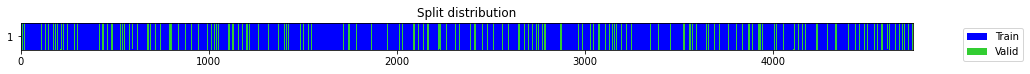

In [63]:
split_indx = 30

print('Processing Volume data..')

def get_day(x):
    return x.day
def get_month(x):
    return x.month    
def get_year(x):
    return x.year    
# def get_ismonthstart(x):
#     return x.is_month_start

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['Signal']
row = ["feature{}".format(x) for x in np.array(range(IMFS_count+4))] #Change this number to higher if necessary!
scalersIN = pd.DataFrame([], columns = col, index = row)
scalersOUT = pd.DataFrame([], columns = col, index = [0])
from sklearn.preprocessing import OrdinalEncoder
#read TS data as datetime
TS =  pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_TSsequences_' + season + '.csv',header=None)
cols = TS.columns[:]
TS[cols] = TS[cols].apply(pd.to_datetime, errors='coerce')
TS_data = TS.iloc[:,:] # Train set 
TS_D = TS_data.applymap(get_day)
TS_Y = TS_data.applymap(get_year)
TS_M = TS_data.applymap(get_month)
# TS_Mstart = TS_data.applymap(get_ismonthstart)

# define ordinal encoding
encoder_H = OrdinalEncoder()
encoder_D = OrdinalEncoder()
encoder_month = OrdinalEncoder()
# encoder_monthstart = OrdinalEncoder()
# transform data
TS_D = to3d(encoder_H.fit_transform(TS_D))
TS_Y = to3d(encoder_D.fit_transform(TS_Y))
TS_M = to3d(encoder_month.fit_transform(TS_M))
# TS_Mstart = to3d(encoder_monthstart.fit_transform(TS_Mstart))

test_targetdata={}
test_predsdata={}

test_targetdata={}
test_predsdata={}

print('splitting data..')
for x in range(IMFS_count+1):   #Initialize
  exec('temp' + str(x) + ' = np.zeros((Vol.shape[0],Vol.shape[1]))')

for x in range(0,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  print('-IMF',x,', splitting data..')
  exec('temp' + str(x) + ' = to3d(VMD_Vol.iloc[x::IMFS_count+1,:].values)')

Vol_data_allIMFs = temp0
for x in range(1,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  exec('Vol_data_allIMFs = np.concatenate((temp' + str(x) + ', Vol_data_allIMFs), axis=1)')

# Temp_data = to3d(Temp.iloc[:,:].values)
data = np.concatenate([Vol_data_allIMFs, TS_D, TS_Y, TS_M],axis=1)  #, TS_Mend, TS_Mstart
data_X = data[:,:,:split_indx]
data_y = Vol.iloc[:,split_indx:]
X_train, X_test = data_X[:TS.shape[0]-int(TS.shape[0]*20/100)], data_X[-int(TS.shape[0]*20/100):]
y_train, y_test = data_y[:TS.shape[0]-int(TS.shape[0]*20/100)], data_y[-int(TS.shape[0]*20/100):]
print('Standardizing data..')
for i in range(X_train.shape[1]): #normalize IN data
  scalersIN['Signal']["feature{}".format(i)] = StandardScaler()
  X_train[:, i, :] = scalersIN['Signal']["feature{}".format(i)].fit_transform(X_train[:, i, :])    
scalersOUT['Signal'] = StandardScaler() #normalize OUT data
y_train = scalersOUT['Signal'][0].fit_transform(y_train)  
print('training set: ',X_train.shape, y_train.shape, ', testing set: ',X_test.shape, y_test.shape)

splits = get_splits(y_train, valid_size=.2, stratify=False, random_state=42, shuffle=True)
tfms  = [None, [ToFloat(), ToNumpyTensor()]]
dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128])    
#**************#**************#**************#**************#**************#**************#**************#**************

#### Model learning

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.885535,0.608786,0.630230,0.780247,00:00
1,0.608086,0.206722,0.385496,0.454667,00:00
2,0.432305,0.083970,0.226710,0.289775,00:00
3,0.322254,0.067494,0.213913,0.259797,00:00
4,0.248388,0.016941,0.095265,0.130158,00:00
5,0.194588,0.011147,0.079308,0.105579,00:00
6,0.155300,0.007325,0.057960,0.085589,00:00
7,0.125906,0.006315,0.052597,0.079466,00:00
8,0.103399,0.005086,0.045475,0.071316,00:00
9,0.085773,0.004163,0.040844,0.064522,00:00


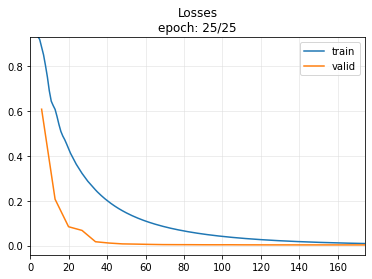

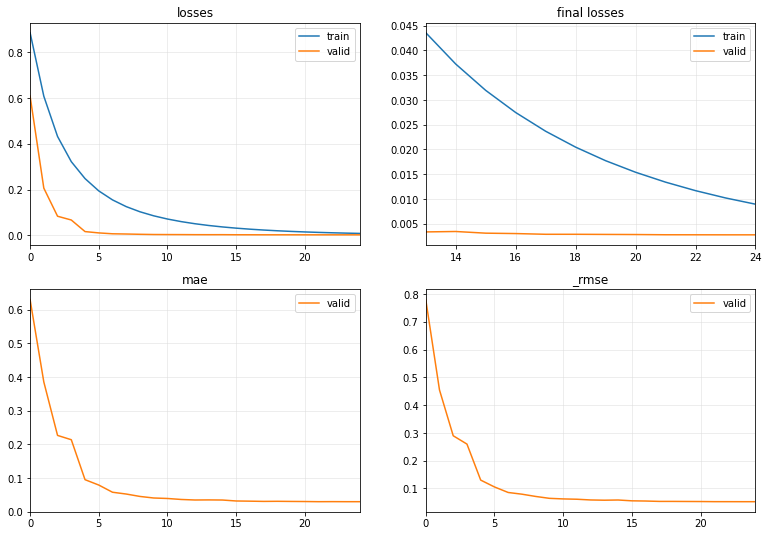

Targets and Predictions shapes (1187, 7) (1187, 7)
LSTMPlus : MAPE =  2.032653046662955 MAE =  0.2639591350100493 RMSE =  0.395517250026756


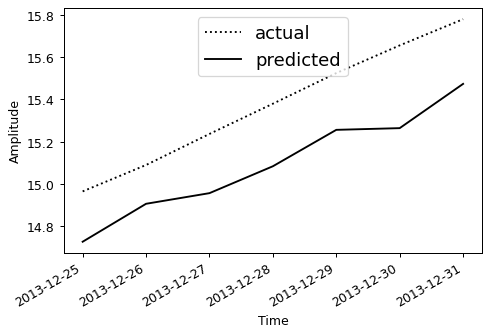

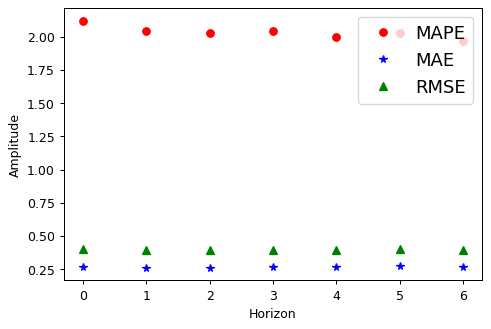

In [64]:
#Model learning
learn = TSForecaster(X_train, y_train, splits=splits, tfms=tfms, bs=512, arch=model_name, arch_config=par, metrics=[mae, rmse], cbs=[ShowGraph(),SaveModel()])
learn.fit_one_cycle(freeze_epoch, learning_rate)
# #save trained model
# learn.save_all(path='/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export', dls_fname='dls', model_fname='WP_TIME_multistep_' + learn.model.__class__.__name__ + '_' + HOUSE, learner_fname='learner')
valid_dl = dls.valid

# Labeled test data
for i in range(X_test.shape[1]): #normalize IN data
  X_test[:, i, :] = scalersIN['Signal']["feature{}".format(i)].transform(X_test[:, i, :])    
y_test = scalersOUT['Signal'][0].transform(y_test)  
test_ds = valid_dl.dataset.add_test(X_test, y_test)
test_dl = valid_dl.new(test_ds)
_, temp_targets, temp_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
#denormalize data
test_predsdata = scalersOUT['Signal'][0].inverse_transform(temp_preds)  
test_targetdata = scalersOUT['Signal'][0].inverse_transform(temp_targets)    
del temp_targets, temp_preds
# RMSE.append(rmse(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# MAE.append(mae(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# print(f'RMSE: {RMSE[x]:10.6f}, MAE: {MAE[x]:10.6f}')
d = pd.DataFrame([])
d = test_targetdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_targetdata_VOLF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', d, delimiter=',')
dp = pd.DataFrame([])
dp = test_predsdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_predsdata_VOLF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', dp, delimiter=',')

#TEST MODEL
import numpy as np
import matplotlib.pyplot as plt
print('Targets and Predictions shapes', d.shape, dp.shape)

MAPE = []
MAE  = []
RMSE = []
for i in range(d.shape[1]): 
  MAPE.append(np.mean(np.abs((d[:,i] - dp[:,i]) / d[:,i]))*100)
  MAE.append(np.mean(np.abs((d[:,i] - dp[:,i]))))
  RMSE.append(np.sqrt(np.mean((d[:,i] - dp[:,i])**2)))
print(learn.model.__class__.__name__,': MAPE = ',np.mean(MAPE), 'MAE = ',np.mean(MAE), 'RMSE = ',np.mean(RMSE))

# Create plots with pre-defined labels.
fig, ax = plt.subplots(dpi = 90)
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], d[0][:], 'k:', label='actual')
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], dp[0][:], 'k-', label='predicted')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper center',fontsize='x-large')

plt.show()

# Create plots with pre-defined labels.
fig_step, ax_step = plt.subplots(dpi = 90)
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAPE, 'ro', label='MAPE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAE, 'b*', label='MAE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),RMSE, 'g^', label='RMSE')
plt.ylabel('Amplitude')
plt.xlabel('Horizon')
legend = ax_step.legend(loc='upper right',fontsize='x-large')

plt.show()


## season2

In [65]:
season = season2
IMFS_count = K_SpringSummer
if hrz == '7d':
  exec('n_layers = 3')
  exec('bias = True')
  exec('rnn_dropout = 0.286473396016963')
  exec('bidirectional = True')
  exec('fc_dropout = 0.158475012329661')
  exec('bn = False')
  exec('learning_rate = 0.00317586666858998')
elif hrz == '1m':
  exec('n_layers = 8')
  exec('bias = True')
  exec('rnn_dropout = 0.302047446421328')
  exec('bidirectional = True')
  exec('fc_dropout = 0.322673019184526')
  exec('bn = True')
  exec('learning_rate = 0.00137707061978508')
par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

### All-in-one strategy

In [66]:
ind = str(IMFS_count) + 'IMFs' #change this!!
mode = 'VolTime_'

Vol = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Volsequences_' + season + '.csv',header=None)
VMD_Vol = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Volsequences_' + ind + '_' + season + '.csv')
VMD_Vol = VMD_Vol.drop(columns='Element0')
Vol

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,32.423,32.467,32.517,32.553,32.580,32.603,32.625,32.661,32.701,32.725,...,32.984,32.987,32.991,33.002,33.002,33.009,33.023,33.035,33.028,33.025
1,32.467,32.517,32.553,32.580,32.603,32.625,32.661,32.701,32.725,32.738,...,32.987,32.991,33.002,33.002,33.009,33.023,33.035,33.028,33.025,33.013
2,32.517,32.553,32.580,32.603,32.625,32.661,32.701,32.725,32.738,32.767,...,32.991,33.002,33.002,33.009,33.023,33.035,33.028,33.025,33.013,32.968
3,32.553,32.580,32.603,32.625,32.661,32.701,32.725,32.738,32.767,32.807,...,33.002,33.002,33.009,33.023,33.035,33.028,33.025,33.013,32.968,32.934
4,32.580,32.603,32.625,32.661,32.701,32.725,32.738,32.767,32.807,32.841,...,33.002,33.009,33.023,33.035,33.028,33.025,33.013,32.968,32.934,32.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,21.583,21.443,21.355,21.242,21.079,20.953,20.766,20.608,20.505,20.397,...,16.915,16.723,16.497,16.238,15.980,15.714,15.433,15.187,14.954,14.660
6812,21.443,21.355,21.242,21.079,20.953,20.766,20.608,20.505,20.397,20.233,...,16.723,16.497,16.238,15.980,15.714,15.433,15.187,14.954,14.660,14.330
6813,21.355,21.242,21.079,20.953,20.766,20.608,20.505,20.397,20.233,20.070,...,16.497,16.238,15.980,15.714,15.433,15.187,14.954,14.660,14.330,13.975
6814,21.242,21.079,20.953,20.766,20.608,20.505,20.397,20.233,20.070,19.868,...,16.238,15.980,15.714,15.433,15.187,14.954,14.660,14.330,13.975,13.719


In [67]:
exec('n_layers = 3')
exec('bias = True')
exec('rnn_dropout = 0.286473396016963')
exec('bidirectional = True')
exec('fc_dropout = 0.158475012329661')
exec('bn = False')
exec('learning_rate = 0.00317586666858998')

par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

Processing Volume data..
splitting data..
-IMF 0 , splitting data..
-IMF 1 , splitting data..
-IMF 2 , splitting data..
-IMF 3 , splitting data..
-IMF 4 , splitting data..
-IMF 5 , splitting data..
-IMF 6 , splitting data..
-IMF 7 , splitting data..
-IMF 8 , splitting data..
-IMF 9 , splitting data..
-IMF 10 , splitting data..
-IMF 11 , splitting data..
-IMF 12 , splitting data..
-IMF 13 , splitting data..
-IMF 14 , splitting data..
-IMF 15 , splitting data..
Standardizing data..
training set:  (5453, 19, 30) (5453, 7) , testing set:  (1363, 19, 30) (1363, 7)


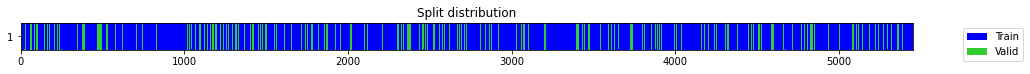

In [68]:
split_indx = 30

print('Processing Volume data..')

def get_day(x):
    return x.day
def get_month(x):
    return x.month    
def get_year(x):
    return x.year    
# def get_ismonthstart(x):
#     return x.is_month_start

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['Signal']
row = ["feature{}".format(x) for x in np.array(range(IMFS_count+4))] #Change this number to higher if necessary!
scalersIN = pd.DataFrame([], columns = col, index = row)
scalersOUT = pd.DataFrame([], columns = col, index = [0])
from sklearn.preprocessing import OrdinalEncoder
#read TS data as datetime
TS =  pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_TSsequences_' + season + '.csv',header=None)
cols = TS.columns[:]
TS[cols] = TS[cols].apply(pd.to_datetime, errors='coerce')
TS_data = TS.iloc[:,:] # Train set 
TS_D = TS_data.applymap(get_day)
TS_Y = TS_data.applymap(get_year)
TS_M = TS_data.applymap(get_month)
# TS_Mstart = TS_data.applymap(get_ismonthstart)

# define ordinal encoding
encoder_H = OrdinalEncoder()
encoder_D = OrdinalEncoder()
encoder_month = OrdinalEncoder()
# encoder_monthstart = OrdinalEncoder()
# transform data
TS_D = to3d(encoder_H.fit_transform(TS_D))
TS_Y = to3d(encoder_D.fit_transform(TS_Y))
TS_M = to3d(encoder_month.fit_transform(TS_M))
# TS_Mstart = to3d(encoder_monthstart.fit_transform(TS_Mstart))

test_targetdata={}
test_predsdata={}

test_targetdata={}
test_predsdata={}

print('splitting data..')
for x in range(IMFS_count+1):   #Initialize
  exec('temp' + str(x) + ' = np.zeros((Vol.shape[0],Vol.shape[1]))')

for x in range(0,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  print('-IMF',x,', splitting data..')
  exec('temp' + str(x) + ' = to3d(VMD_Vol.iloc[x::IMFS_count+1,:].values)')

Vol_data_allIMFs = temp0
for x in range(1,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  exec('Vol_data_allIMFs = np.concatenate((temp' + str(x) + ', Vol_data_allIMFs), axis=1)')

# Temp_data = to3d(Temp.iloc[:,:].values)
data = np.concatenate([Vol_data_allIMFs, TS_D, TS_Y, TS_M],axis=1)  #, TS_Mend, TS_Mstart
data_X = data[:,:,:split_indx]
data_y = Vol.iloc[:,split_indx:]
X_train, X_test = data_X[:TS.shape[0]-int(TS.shape[0]*20/100)], data_X[-int(TS.shape[0]*20/100):]
y_train, y_test = data_y[:TS.shape[0]-int(TS.shape[0]*20/100)], data_y[-int(TS.shape[0]*20/100):]
print('Standardizing data..')
for i in range(X_train.shape[1]): #normalize IN data
  scalersIN['Signal']["feature{}".format(i)] = StandardScaler()
  X_train[:, i, :] = scalersIN['Signal']["feature{}".format(i)].fit_transform(X_train[:, i, :])    
scalersOUT['Signal'] = StandardScaler() #normalize OUT data
y_train = scalersOUT['Signal'][0].fit_transform(y_train)  
print('training set: ',X_train.shape, y_train.shape, ', testing set: ',X_test.shape, y_test.shape)

splits = get_splits(y_train, valid_size=.2, stratify=False, random_state=42, shuffle=True)
tfms  = [None, [ToFloat(), ToNumpyTensor()]]
dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128])    
#**************#**************#**************#**************#**************#**************#**************#**************

#### Model learning

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.759764,0.333853,0.489779,0.577800,00:00
1,0.459999,0.037343,0.160489,0.193243,00:00
2,0.315361,0.080328,0.245932,0.283422,00:00
3,0.232310,0.036880,0.163963,0.192042,00:00
4,0.176014,0.016992,0.108147,0.130352,00:00
5,0.135870,0.004012,0.049408,0.063340,00:00
6,0.107021,0.004204,0.053719,0.064838,00:00
7,0.085709,0.002316,0.037900,0.048126,00:00
8,0.069514,0.001387,0.028934,0.037239,00:00
9,0.056960,0.001287,0.027621,0.035879,00:00


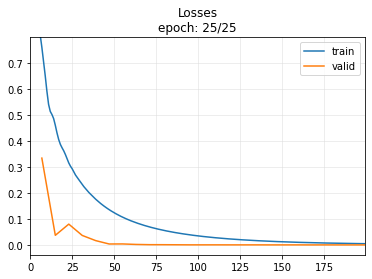

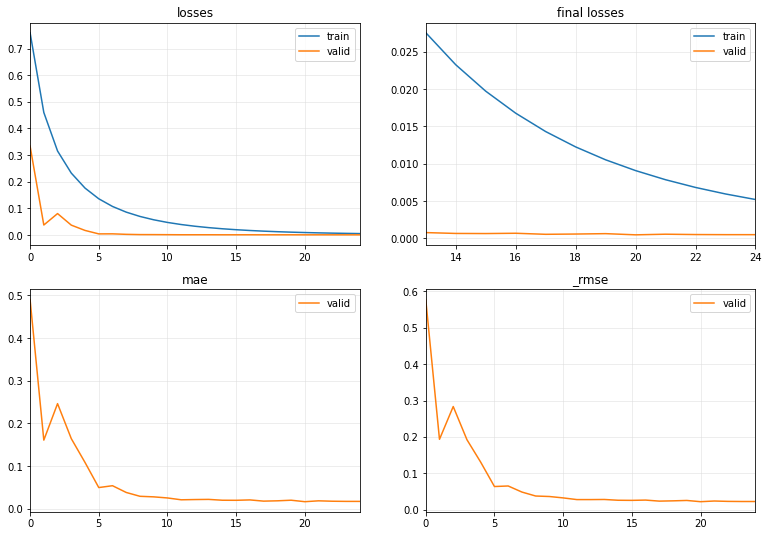

Targets and Predictions shapes (1363, 7) (1363, 7)
LSTMPlus : MAPE =  3.916867082289074 MAE =  0.29343179342980463 RMSE =  0.39153560991990805


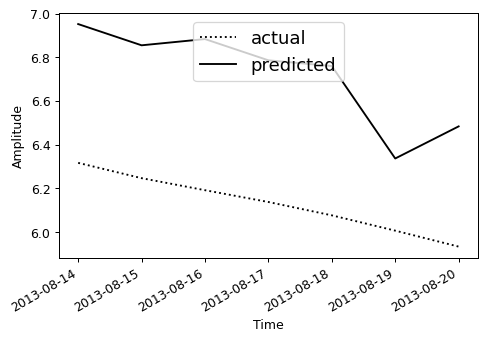

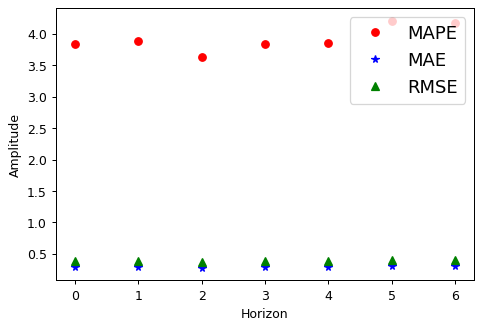

In [69]:
#Model learning
learn = TSForecaster(X_train, y_train, splits=splits, tfms=tfms, bs=512, arch=model_name, arch_config=par, metrics=[mae, rmse], cbs=[ShowGraph(),SaveModel()])
learn.fit_one_cycle(freeze_epoch, learning_rate)
# #save trained model
# learn.save_all(path='/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export', dls_fname='dls', model_fname='WP_TIME_multistep_' + learn.model.__class__.__name__ + '_' + HOUSE, learner_fname='learner')
valid_dl = dls.valid

# Labeled test data
for i in range(X_test.shape[1]): #normalize IN data
  X_test[:, i, :] = scalersIN['Signal']["feature{}".format(i)].transform(X_test[:, i, :])    
y_test = scalersOUT['Signal'][0].transform(y_test)  
test_ds = valid_dl.dataset.add_test(X_test, y_test)
test_dl = valid_dl.new(test_ds)
_, temp_targets, temp_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
#denormalize data
test_predsdata = scalersOUT['Signal'][0].inverse_transform(temp_preds)  
test_targetdata = scalersOUT['Signal'][0].inverse_transform(temp_targets)    
del temp_targets, temp_preds
# RMSE.append(rmse(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# MAE.append(mae(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# print(f'RMSE: {RMSE[x]:10.6f}, MAE: {MAE[x]:10.6f}')
d = pd.DataFrame([])
d = test_targetdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_targetdata_VOLF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', d, delimiter=',')
dp = pd.DataFrame([])
dp = test_predsdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_predsdata_VOLF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', dp, delimiter=',')

#TEST MODEL
import numpy as np
import matplotlib.pyplot as plt
print('Targets and Predictions shapes', d.shape, dp.shape)

MAPE = []
MAE  = []
RMSE = []
for i in range(d.shape[1]): 
  MAPE.append(np.mean(np.abs((d[:,i] - dp[:,i]) / d[:,i]))*100)
  MAE.append(np.mean(np.abs((d[:,i] - dp[:,i]))))
  RMSE.append(np.sqrt(np.mean((d[:,i] - dp[:,i])**2)))
print(learn.model.__class__.__name__,': MAPE = ',np.mean(MAPE), 'MAE = ',np.mean(MAE), 'RMSE = ',np.mean(RMSE))

# Create plots with pre-defined labels.
fig, ax = plt.subplots(dpi = 90)
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], d[0][:], 'k:', label='actual')
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], dp[0][:], 'k-', label='predicted')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper center',fontsize='x-large')

plt.show()

# Create plots with pre-defined labels.
fig_step, ax_step = plt.subplots(dpi = 90)
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAPE, 'ro', label='MAPE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAE, 'b*', label='MAE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),RMSE, 'g^', label='RMSE')
plt.ylabel('Amplitude')
plt.xlabel('Horizon')
legend = ax_step.legend(loc='upper right',fontsize='x-large')

plt.show()


# Thickness forecasting next month

In [70]:
hrz = '1m'
K_FallWinter = 71
K_SpringSummer = 29

## season1

In [71]:
season = season1
IMFS_count = K_FallWinter
if hrz == '7d':
  exec('n_layers = 3')
  exec('bias = True')
  exec('rnn_dropout = 0.349762411800935')
  exec('bidirectional = True')
  exec('fc_dropout = 0.0699199708942447')
  exec('bn = False')
  exec('learning_rate = 0.00477257896567688')
elif hrz == '1m':
  exec('n_layers = 5')
  exec('bias = True')
  exec('rnn_dropout = 0.0261758253489527')
  exec('bidirectional = False')
  exec('fc_dropout = 0.347113526814007')
  exec('bn = False')
  exec('learning_rate = 0.00989048675114461')

par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

### All-in-one strategy

In [72]:
ind = str(IMFS_count) + 'IMFs' #change this!!

mode = 'ThickTime_'
Thick = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Thicksequences_' + season + '.csv',header=None)
VMD_Thick = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Thicksequences_' + ind + '_' + season + '.csv')
VMD_Thick = VMD_Thick.drop(columns='Element0')
Thick

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.951,1.955,1.962,1.965,1.973,1.981,1.986,1.984,1.977,1.974,...,2.141,2.144,2.144,2.144,2.141,2.137,2.136,2.135,2.139,2.147
1,1.955,1.962,1.965,1.973,1.981,1.986,1.984,1.977,1.974,1.974,...,2.144,2.144,2.144,2.141,2.137,2.136,2.135,2.139,2.147,2.151
2,1.962,1.965,1.973,1.981,1.986,1.984,1.977,1.974,1.974,1.977,...,2.144,2.144,2.141,2.137,2.136,2.135,2.139,2.147,2.151,2.153
3,1.965,1.973,1.981,1.986,1.984,1.977,1.974,1.974,1.977,1.984,...,2.144,2.141,2.137,2.136,2.135,2.139,2.147,2.151,2.153,2.152
4,1.973,1.981,1.986,1.984,1.977,1.974,1.974,1.977,1.984,1.987,...,2.141,2.137,2.136,2.135,2.139,2.147,2.151,2.153,2.152,2.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666,1.381,1.381,1.385,1.390,1.393,1.399,1.407,1.414,1.417,1.424,...,1.646,1.648,1.647,1.653,1.653,1.656,1.660,1.665,1.666,1.672
4667,1.381,1.385,1.390,1.393,1.399,1.407,1.414,1.417,1.424,1.428,...,1.648,1.647,1.653,1.653,1.656,1.660,1.665,1.666,1.672,1.676
4668,1.385,1.390,1.393,1.399,1.407,1.414,1.417,1.424,1.428,1.436,...,1.647,1.653,1.653,1.656,1.660,1.665,1.666,1.672,1.676,1.681
4669,1.390,1.393,1.399,1.407,1.414,1.417,1.424,1.428,1.436,1.441,...,1.653,1.653,1.656,1.660,1.665,1.666,1.672,1.676,1.681,1.687


In [73]:
exec('n_layers = 3')
exec('bias = True')
exec('rnn_dropout = 0.349762411800935')
exec('bidirectional = True')
exec('fc_dropout = 0.0699199708942447')
exec('bn = False')
exec('learning_rate = 0.00477257896567688')

par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

Processing Thickness data..
splitting data..
-IMF 0 , splitting data..
-IMF 1 , splitting data..
-IMF 2 , splitting data..
-IMF 3 , splitting data..
-IMF 4 , splitting data..
-IMF 5 , splitting data..
-IMF 6 , splitting data..
-IMF 7 , splitting data..
-IMF 8 , splitting data..
-IMF 9 , splitting data..
-IMF 10 , splitting data..
-IMF 11 , splitting data..
-IMF 12 , splitting data..
-IMF 13 , splitting data..
-IMF 14 , splitting data..
-IMF 15 , splitting data..
-IMF 16 , splitting data..
-IMF 17 , splitting data..
-IMF 18 , splitting data..
-IMF 19 , splitting data..
-IMF 20 , splitting data..
-IMF 21 , splitting data..
-IMF 22 , splitting data..
-IMF 23 , splitting data..
-IMF 24 , splitting data..
-IMF 25 , splitting data..
-IMF 26 , splitting data..
-IMF 27 , splitting data..
-IMF 28 , splitting data..
-IMF 29 , splitting data..
-IMF 30 , splitting data..
-IMF 31 , splitting data..
-IMF 32 , splitting data..
-IMF 33 , splitting data..
-IMF 34 , splitting data..
-IMF 35 , splitting 

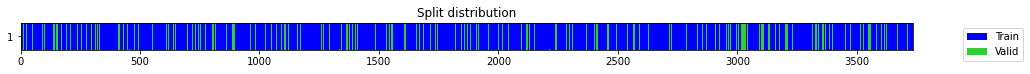

In [74]:
split_indx = 30

print('Processing Thickness data..')

def get_day(x):
    return x.day
def get_month(x):
    return x.month    
def get_year(x):
    return x.year    
# def get_ismonthstart(x):
#     return x.is_month_start

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['Signal']
row = ["feature{}".format(x) for x in np.array(range(IMFS_count+4))] #Change this number to higher if necessary!
scalersIN = pd.DataFrame([], columns = col, index = row)
scalersOUT = pd.DataFrame([], columns = col, index = [0])
from sklearn.preprocessing import OrdinalEncoder
#read TS data as datetime
TS =  pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_TSsequences_' + season + '.csv',header=None)
cols = TS.columns[:]
TS[cols] = TS[cols].apply(pd.to_datetime, errors='coerce')
TS_data = TS.iloc[:,:] # Train set 
TS_D = TS_data.applymap(get_day)
TS_Y = TS_data.applymap(get_year)
TS_M = TS_data.applymap(get_month)
# TS_Mstart = TS_data.applymap(get_ismonthstart)

# define ordinal encoding
encoder_H = OrdinalEncoder()
encoder_D = OrdinalEncoder()
encoder_month = OrdinalEncoder()
# encoder_monthstart = OrdinalEncoder()
# transform data
TS_D = to3d(encoder_H.fit_transform(TS_D))
TS_Y = to3d(encoder_D.fit_transform(TS_Y))
TS_M = to3d(encoder_month.fit_transform(TS_M))
# TS_Mstart = to3d(encoder_monthstart.fit_transform(TS_Mstart))

test_targetdata={}
test_predsdata={}

test_targetdata={}
test_predsdata={}

print('splitting data..')
for x in range(IMFS_count+1):   #Initialize
  exec('temp' + str(x) + ' = np.zeros((Thick.shape[0],Thick.shape[1]))')

for x in range(0,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  print('-IMF',x,', splitting data..')
  exec('temp' + str(x) + ' = to3d(VMD_Thick.iloc[x::IMFS_count+1,:].values)')

Thick_data_allIMFs = temp0
for x in range(1,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  exec('Thick_data_allIMFs = np.concatenate((temp' + str(x) + ', Thick_data_allIMFs), axis=1)')

# Temp_data = to3d(Temp.iloc[:,:].values)
data = np.concatenate([Thick_data_allIMFs, TS_D, TS_Y, TS_M],axis=1)  #, TS_Mend, TS_Mstart
data_X = data[:,:,:split_indx]
data_y = Thick.iloc[:,split_indx:]
X_train, X_test = data_X[:TS.shape[0]-int(TS.shape[0]*20/100)], data_X[-int(TS.shape[0]*20/100):]
y_train, y_test = data_y[:TS.shape[0]-int(TS.shape[0]*20/100)], data_y[-int(TS.shape[0]*20/100):]
print('Standardizing data..')
for i in range(X_train.shape[1]): #normalize IN data
  scalersIN['Signal']["feature{}".format(i)] = StandardScaler()
  X_train[:, i, :] = scalersIN['Signal']["feature{}".format(i)].fit_transform(X_train[:, i, :])    
scalersOUT['Signal'] = StandardScaler() #normalize OUT data
y_train = scalersOUT['Signal'][0].fit_transform(y_train)  
print('training set: ',X_train.shape, y_train.shape, ', testing set: ',X_test.shape, y_test.shape)

splits = get_splits(y_train, valid_size=.2, stratify=False, random_state=42, shuffle=True)
tfms  = [None, [ToFloat(), ToNumpyTensor()]]
dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128])    
#**************#**************#**************#**************#**************#**************#**************#**************

#### Model learning

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.898544,0.549713,0.589994,0.741426,00:00
1,0.617602,0.322132,0.477633,0.567567,00:00
2,0.455028,0.113102,0.259825,0.336307,00:00
3,0.350641,0.096226,0.240868,0.310203,00:00
4,0.281637,0.070539,0.198639,0.265592,00:00
5,0.230869,0.030582,0.117368,0.174878,00:00
6,0.191189,0.022363,0.108216,0.149541,00:00
7,0.160475,0.020243,0.096925,0.142278,00:00
8,0.136390,0.016480,0.091912,0.128375,00:00
9,0.117130,0.012796,0.073737,0.113121,00:00


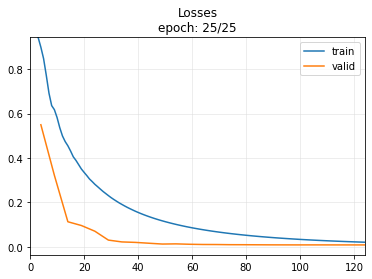

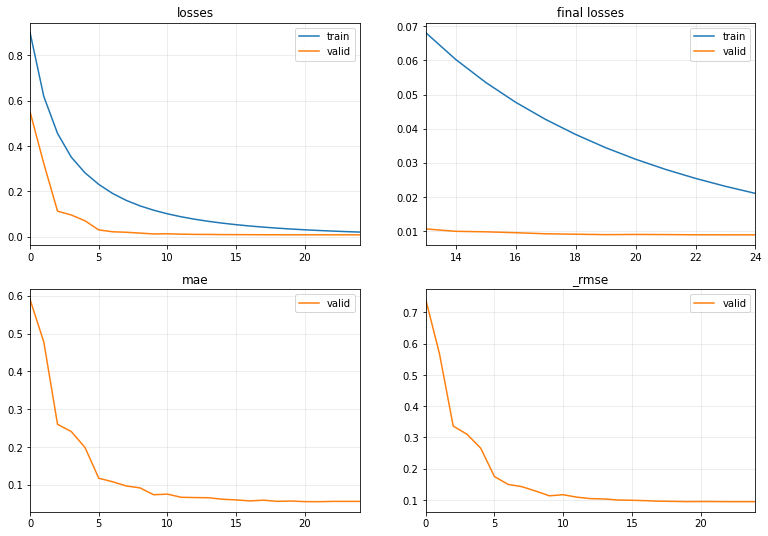

Targets and Predictions shapes (934, 30) (934, 30)
LSTMPlus : MAPE =  1.5235520059211267 MAE =  0.018811612082483487 RMSE =  0.03208352509919186


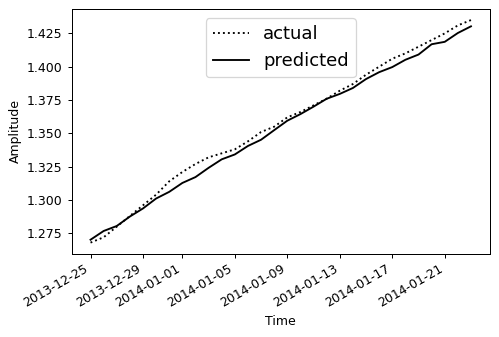

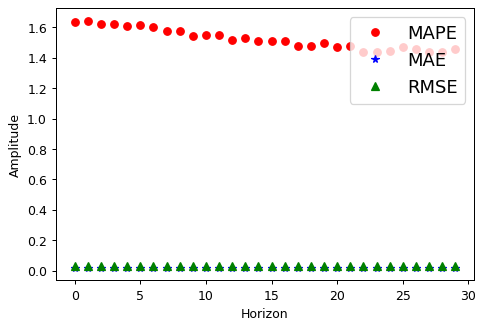

In [75]:
#Model learning
learn = TSForecaster(X_train, y_train, splits=splits, tfms=tfms, bs=512, arch=model_name, arch_config=par, metrics=[mae, rmse], cbs=[ShowGraph(),SaveModel()])
learn.fit_one_cycle(freeze_epoch, learning_rate)
# #save trained model
# learn.save_all(path='/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export', dls_fname='dls', model_fname='WP_TIME_multistep_' + learn.model.__class__.__name__ + '_' + HOUSE, learner_fname='learner')
valid_dl = dls.valid

# Labeled test data
for i in range(X_test.shape[1]): #normalize IN data
  X_test[:, i, :] = scalersIN['Signal']["feature{}".format(i)].transform(X_test[:, i, :])    
y_test = scalersOUT['Signal'][0].transform(y_test)  
test_ds = valid_dl.dataset.add_test(X_test, y_test)
test_dl = valid_dl.new(test_ds)
_, temp_targets, temp_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
#denormalize data
test_predsdata = scalersOUT['Signal'][0].inverse_transform(temp_preds)  
test_targetdata = scalersOUT['Signal'][0].inverse_transform(temp_targets)    
del temp_targets, temp_preds
# RMSE.append(rmse(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# MAE.append(mae(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# print(f'RMSE: {RMSE[x]:10.6f}, MAE: {MAE[x]:10.6f}')
d = pd.DataFrame([])
d = test_targetdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_targetdata_THICKF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', d, delimiter=',')
dp = pd.DataFrame([])
dp = test_predsdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_predsdata_THICKF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', dp, delimiter=',')

#TEST MODEL
import numpy as np
import matplotlib.pyplot as plt
print('Targets and Predictions shapes', d.shape, dp.shape)

MAPE = []
MAE  = []
RMSE = []
for i in range(d.shape[1]): 
  MAPE.append(np.mean(np.abs((d[:,i] - dp[:,i]) / d[:,i]))*100)
  MAE.append(np.mean(np.abs((d[:,i] - dp[:,i]))))
  RMSE.append(np.sqrt(np.mean((d[:,i] - dp[:,i])**2)))
print(learn.model.__class__.__name__,': MAPE = ',np.mean(MAPE), 'MAE = ',np.mean(MAE), 'RMSE = ',np.mean(RMSE))

# Create plots with pre-defined labels.
fig, ax = plt.subplots(dpi = 90)
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], d[0][:], 'k:', label='actual')
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], dp[0][:], 'k-', label='predicted')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper center',fontsize='x-large')

plt.show()

# Create plots with pre-defined labels.
fig_step, ax_step = plt.subplots(dpi = 90)
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAPE, 'ro', label='MAPE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAE, 'b*', label='MAE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),RMSE, 'g^', label='RMSE')
plt.ylabel('Amplitude')
plt.xlabel('Horizon')
legend = ax_step.legend(loc='upper right',fontsize='x-large')

plt.show()


## season2

In [76]:
season = season2
IMFS_count = K_SpringSummer
if hrz == '7d':
  exec('n_layers = 3')
  exec('bias = True')
  exec('rnn_dropout = 0.206020497557491')
  exec('bidirectional = True')
  exec('fc_dropout = 0.25930529437731')
  exec('bn = True')
  exec('learning_rate = 0.00643004520621305')
elif hrz == '1m':
  exec('n_layers = 5')
  exec('bias = True')
  exec('rnn_dropout = 0.0997489621828708')
  exec('bidirectional = True')
  exec('fc_dropout = 0.343024842102137')
  exec('bn = True')
  exec('learning_rate = 0.00383757639464114')
par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

### All-in-one strategy

In [77]:
ind = str(IMFS_count) + 'IMFs' #change this!!
mode = 'ThickTime_'

Thick = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Thicksequences_' + season + '.csv',header=None)
VMD_Thick = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Thicksequences_' + ind + '_' + season + '.csv')
VMD_Thick = VMD_Thick.drop(columns='Element0')
Thick

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,2.223,2.234,2.244,2.256,2.263,2.271,2.277,2.279,2.282,2.291,...,2.536,2.541,2.546,2.545,2.551,2.557,2.556,2.556,2.567,2.575
1,2.234,2.244,2.256,2.263,2.271,2.277,2.279,2.282,2.291,2.295,...,2.541,2.546,2.545,2.551,2.557,2.556,2.556,2.567,2.575,2.583
2,2.244,2.256,2.263,2.271,2.277,2.279,2.282,2.291,2.295,2.302,...,2.546,2.545,2.551,2.557,2.556,2.556,2.567,2.575,2.583,2.589
3,2.256,2.263,2.271,2.277,2.279,2.282,2.291,2.295,2.302,2.305,...,2.545,2.551,2.557,2.556,2.556,2.567,2.575,2.583,2.589,2.592
4,2.263,2.271,2.277,2.279,2.282,2.291,2.295,2.302,2.305,2.308,...,2.551,2.557,2.556,2.556,2.567,2.575,2.583,2.589,2.592,2.595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,1.844,1.847,1.847,1.844,1.839,1.838,1.840,1.838,1.839,1.842,...,1.635,1.633,1.622,1.612,1.605,1.601,1.593,1.582,1.568,1.553
5800,1.847,1.847,1.844,1.839,1.838,1.840,1.838,1.839,1.842,1.839,...,1.633,1.622,1.612,1.605,1.601,1.593,1.582,1.568,1.553,1.536
5801,1.847,1.844,1.839,1.838,1.840,1.838,1.839,1.842,1.839,1.837,...,1.622,1.612,1.605,1.601,1.593,1.582,1.568,1.553,1.536,1.513
5802,1.844,1.839,1.838,1.840,1.838,1.839,1.842,1.839,1.837,1.827,...,1.612,1.605,1.601,1.593,1.582,1.568,1.553,1.536,1.513,1.501


In [78]:
exec('n_layers = 3')
exec('bias = True')
exec('rnn_dropout = 0.206020497557491')
exec('bidirectional = True')
exec('fc_dropout = 0.25930529437731')
exec('bn = True')
exec('learning_rate = 0.00643004520621305')

par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

Processing Thickness data..
splitting data..
-IMF 0 , splitting data..
-IMF 1 , splitting data..
-IMF 2 , splitting data..
-IMF 3 , splitting data..
-IMF 4 , splitting data..
-IMF 5 , splitting data..
-IMF 6 , splitting data..
-IMF 7 , splitting data..
-IMF 8 , splitting data..
-IMF 9 , splitting data..
-IMF 10 , splitting data..
-IMF 11 , splitting data..
-IMF 12 , splitting data..
-IMF 13 , splitting data..
-IMF 14 , splitting data..
-IMF 15 , splitting data..
-IMF 16 , splitting data..
-IMF 17 , splitting data..
-IMF 18 , splitting data..
-IMF 19 , splitting data..
-IMF 20 , splitting data..
-IMF 21 , splitting data..
-IMF 22 , splitting data..
-IMF 23 , splitting data..
-IMF 24 , splitting data..
-IMF 25 , splitting data..
-IMF 26 , splitting data..
-IMF 27 , splitting data..
-IMF 28 , splitting data..
-IMF 29 , splitting data..
Standardizing data..
training set:  (4644, 33, 30) (4644, 30) , testing set:  (1160, 33, 30) (1160, 30)


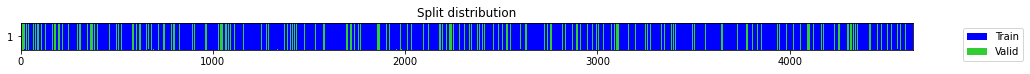

In [79]:
split_indx = 30

print('Processing Thickness data..')

def get_day(x):
    return x.day
def get_month(x):
    return x.month    
def get_year(x):
    return x.year    
# def get_ismonthstart(x):
#     return x.is_month_start

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['Signal']
row = ["feature{}".format(x) for x in np.array(range(IMFS_count+4))] #Change this number to higher if necessary!
scalersIN = pd.DataFrame([], columns = col, index = row)
scalersOUT = pd.DataFrame([], columns = col, index = [0])
from sklearn.preprocessing import OrdinalEncoder
#read TS data as datetime
TS =  pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_TSsequences_' + season + '.csv',header=None)
cols = TS.columns[:]
TS[cols] = TS[cols].apply(pd.to_datetime, errors='coerce')
TS_data = TS.iloc[:,:] # Train set 
TS_D = TS_data.applymap(get_day)
TS_Y = TS_data.applymap(get_year)
TS_M = TS_data.applymap(get_month)
# TS_Mstart = TS_data.applymap(get_ismonthstart)

# define ordinal encoding
encoder_H = OrdinalEncoder()
encoder_D = OrdinalEncoder()
encoder_month = OrdinalEncoder()
# encoder_monthstart = OrdinalEncoder()
# transform data
TS_D = to3d(encoder_H.fit_transform(TS_D))
TS_Y = to3d(encoder_D.fit_transform(TS_Y))
TS_M = to3d(encoder_month.fit_transform(TS_M))
# TS_Mstart = to3d(encoder_monthstart.fit_transform(TS_Mstart))

test_targetdata={}
test_predsdata={}

test_targetdata={}
test_predsdata={}

print('splitting data..')
for x in range(IMFS_count+1):   #Initialize
  exec('temp' + str(x) + ' = np.zeros((Thick.shape[0],Thick.shape[1]))')

for x in range(0,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  print('-IMF',x,', splitting data..')
  exec('temp' + str(x) + ' = to3d(VMD_Thick.iloc[x::IMFS_count+1,:].values)')

Thick_data_allIMFs = temp0
for x in range(1,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  exec('Thick_data_allIMFs = np.concatenate((temp' + str(x) + ', Thick_data_allIMFs), axis=1)')

# Temp_data = to3d(Temp.iloc[:,:].values)
data = np.concatenate([Thick_data_allIMFs, TS_D, TS_Y, TS_M],axis=1)  #, TS_Mend, TS_Mstart
data_X = data[:,:,:split_indx]
data_y = Thick.iloc[:,split_indx:]
X_train, X_test = data_X[:TS.shape[0]-int(TS.shape[0]*20/100)], data_X[-int(TS.shape[0]*20/100):]
y_train, y_test = data_y[:TS.shape[0]-int(TS.shape[0]*20/100)], data_y[-int(TS.shape[0]*20/100):]
print('Standardizing data..')
for i in range(X_train.shape[1]): #normalize IN data
  scalersIN['Signal']["feature{}".format(i)] = StandardScaler()
  X_train[:, i, :] = scalersIN['Signal']["feature{}".format(i)].fit_transform(X_train[:, i, :])    
scalersOUT['Signal'] = StandardScaler() #normalize OUT data
y_train = scalersOUT['Signal'][0].fit_transform(y_train)  
print('training set: ',X_train.shape, y_train.shape, ', testing set: ',X_test.shape, y_test.shape)

splits = get_splits(y_train, valid_size=.2, stratify=False, random_state=42, shuffle=True)
tfms  = [None, [ToFloat(), ToNumpyTensor()]]
dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128])    
#**************#**************#**************#**************#**************#**************#**************#**************

#### Model learning

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.627543,0.141535,0.304141,0.376211,00:00
1,0.410815,0.258499,0.395746,0.508428,00:00
2,0.300742,0.105412,0.246476,0.324673,00:00
3,0.226706,0.021244,0.109543,0.145754,00:00
4,0.173679,0.013827,0.090921,0.117588,00:00
5,0.136647,0.008154,0.064277,0.090301,00:00
6,0.109480,0.007105,0.057775,0.084293,00:00
7,0.089303,0.005248,0.053385,0.072441,00:00
8,0.073677,0.003559,0.042443,0.059658,00:00
9,0.061449,0.003315,0.039763,0.057574,00:00


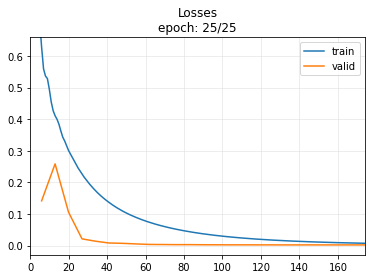

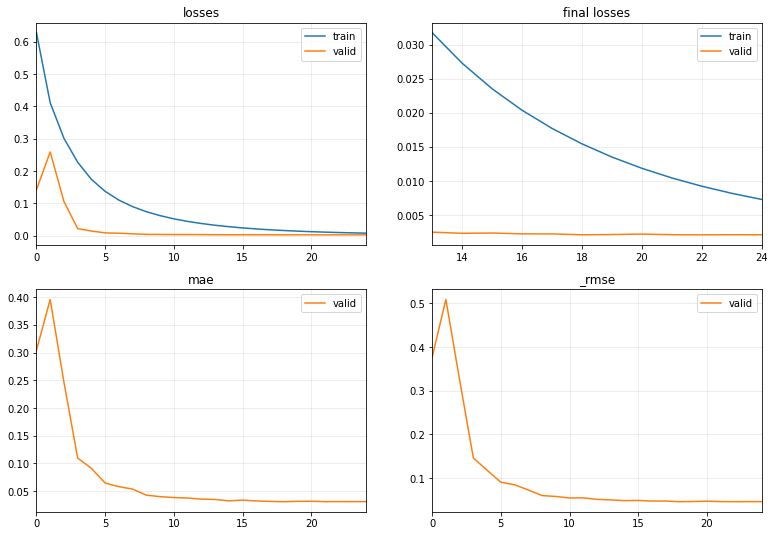

Targets and Predictions shapes (1160, 30) (1160, 30)
LSTMPlus : MAPE =  1.9447159558944003 MAE =  0.025454020848626482 RMSE =  0.04974475998623041


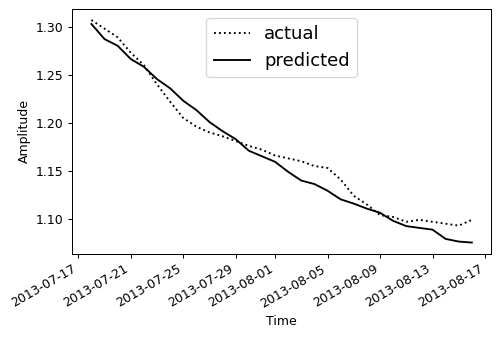

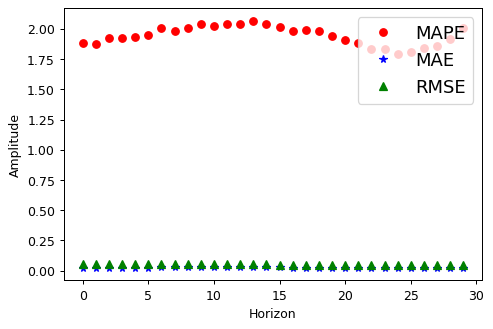

In [80]:
#Model learning
learn = TSForecaster(X_train, y_train, splits=splits, tfms=tfms, bs=512, arch=model_name, arch_config=par, metrics=[mae, rmse], cbs=[ShowGraph(),SaveModel()])
learn.fit_one_cycle(freeze_epoch, learning_rate)
# #save trained model
# learn.save_all(path='/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export', dls_fname='dls', model_fname='WP_TIME_multistep_' + learn.model.__class__.__name__ + '_' + HOUSE, learner_fname='learner')
valid_dl = dls.valid

# Labeled test data
for i in range(X_test.shape[1]): #normalize IN data
  X_test[:, i, :] = scalersIN['Signal']["feature{}".format(i)].transform(X_test[:, i, :])    
y_test = scalersOUT['Signal'][0].transform(y_test)  
test_ds = valid_dl.dataset.add_test(X_test, y_test)
test_dl = valid_dl.new(test_ds)
_, temp_targets, temp_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
#denormalize data
test_predsdata = scalersOUT['Signal'][0].inverse_transform(temp_preds)  
test_targetdata = scalersOUT['Signal'][0].inverse_transform(temp_targets)    
del temp_targets, temp_preds
# RMSE.append(rmse(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# MAE.append(mae(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# print(f'RMSE: {RMSE[x]:10.6f}, MAE: {MAE[x]:10.6f}')
d = pd.DataFrame([])
d = test_targetdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_targetdata_THICKF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', d, delimiter=',')
dp = pd.DataFrame([])
dp = test_predsdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_predsdata_THICKF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', dp, delimiter=',')

#TEST MODEL
import numpy as np
import matplotlib.pyplot as plt
print('Targets and Predictions shapes', d.shape, dp.shape)

MAPE = []
MAE  = []
RMSE = []
for i in range(d.shape[1]): 
  MAPE.append(np.mean(np.abs((d[:,i] - dp[:,i]) / d[:,i]))*100)
  MAE.append(np.mean(np.abs((d[:,i] - dp[:,i]))))
  RMSE.append(np.sqrt(np.mean((d[:,i] - dp[:,i])**2)))
print(learn.model.__class__.__name__,': MAPE = ',np.mean(MAPE), 'MAE = ',np.mean(MAE), 'RMSE = ',np.mean(RMSE))

# Create plots with pre-defined labels.
fig, ax = plt.subplots(dpi = 90)
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], d[0][:], 'k:', label='actual')
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], dp[0][:], 'k-', label='predicted')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper center',fontsize='x-large')

plt.show()

# Create plots with pre-defined labels.
fig_step, ax_step = plt.subplots(dpi = 90)
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAPE, 'ro', label='MAPE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAE, 'b*', label='MAE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),RMSE, 'g^', label='RMSE')
plt.ylabel('Amplitude')
plt.xlabel('Horizon')
legend = ax_step.legend(loc='upper right',fontsize='x-large')

plt.show()


# Volume forecasting next month

In [81]:
K_FallWinter = 63
K_SpringSummer = 31

## season1

In [82]:
season = season1
IMFS_count = K_FallWinter
if hrz == '7d':
  exec('n_layers = 5')
  exec('bias = True')
  exec('rnn_dropout = 0.0709853745722906')
  exec('bidirectional = True')
  exec('fc_dropout = 0.183655043366851')
  exec('bn = True')
  exec('learning_rate = 0.00249451151026499')
elif hrz == '1m':
  exec('n_layers = 8')
  exec('bias = True')
  exec('rnn_dropout = 0.243785095463468')
  exec('bidirectional = True')
  exec('fc_dropout = 0.226997243743688')
  exec('bn = True')
  exec('learning_rate = 0.00276596698031506')
par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

### All-in-one strategy

In [83]:
ind = str(IMFS_count) + 'IMFs' #change this!!
mode = 'VolTime_'
Vol = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Volsequences_' + season + '.csv',header=None)
VMD_Vol = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Volsequences_' + ind + '_' + season + '.csv')
VMD_Vol = VMD_Vol.drop(columns='Element0')
Vol

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,26.405,26.496,26.582,26.672,26.770,26.867,26.940,27.013,27.095,27.185,...,30.576,30.642,30.718,30.794,30.875,30.950,31.023,31.103,31.177,31.249
1,26.496,26.582,26.672,26.770,26.867,26.940,27.013,27.095,27.185,27.286,...,30.642,30.718,30.794,30.875,30.950,31.023,31.103,31.177,31.249,31.329
2,26.582,26.672,26.770,26.867,26.940,27.013,27.095,27.185,27.286,27.381,...,30.718,30.794,30.875,30.950,31.023,31.103,31.177,31.249,31.329,31.391
3,26.672,26.770,26.867,26.940,27.013,27.095,27.185,27.286,27.381,27.463,...,30.794,30.875,30.950,31.023,31.103,31.177,31.249,31.329,31.391,31.437
4,26.770,26.867,26.940,27.013,27.095,27.185,27.286,27.381,27.463,27.552,...,30.875,30.950,31.023,31.103,31.177,31.249,31.329,31.391,31.437,31.491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666,18.031,18.117,18.237,18.372,18.497,18.609,18.694,18.787,18.894,18.997,...,21.798,21.866,21.914,21.981,22.045,22.097,22.152,22.235,22.312,22.348
4667,18.117,18.237,18.372,18.497,18.609,18.694,18.787,18.894,18.997,19.085,...,21.866,21.914,21.981,22.045,22.097,22.152,22.235,22.312,22.348,22.398
4668,18.237,18.372,18.497,18.609,18.694,18.787,18.894,18.997,19.085,19.162,...,21.914,21.981,22.045,22.097,22.152,22.235,22.312,22.348,22.398,22.441
4669,18.372,18.497,18.609,18.694,18.787,18.894,18.997,19.085,19.162,19.222,...,21.981,22.045,22.097,22.152,22.235,22.312,22.348,22.398,22.441,22.489


In [84]:
exec('n_layers = 5')
exec('bias = True')
exec('rnn_dropout = 0.0709853745722906')
exec('bidirectional = True')
exec('fc_dropout = 0.183655043366851')
exec('bn = True')
exec('learning_rate = 0.00249451151026499')

par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

Processing Volume data..
splitting data..
-IMF 0 , splitting data..
-IMF 1 , splitting data..
-IMF 2 , splitting data..
-IMF 3 , splitting data..
-IMF 4 , splitting data..
-IMF 5 , splitting data..
-IMF 6 , splitting data..
-IMF 7 , splitting data..
-IMF 8 , splitting data..
-IMF 9 , splitting data..
-IMF 10 , splitting data..
-IMF 11 , splitting data..
-IMF 12 , splitting data..
-IMF 13 , splitting data..
-IMF 14 , splitting data..
-IMF 15 , splitting data..
-IMF 16 , splitting data..
-IMF 17 , splitting data..
-IMF 18 , splitting data..
-IMF 19 , splitting data..
-IMF 20 , splitting data..
-IMF 21 , splitting data..
-IMF 22 , splitting data..
-IMF 23 , splitting data..
-IMF 24 , splitting data..
-IMF 25 , splitting data..
-IMF 26 , splitting data..
-IMF 27 , splitting data..
-IMF 28 , splitting data..
-IMF 29 , splitting data..
-IMF 30 , splitting data..
-IMF 31 , splitting data..
-IMF 32 , splitting data..
-IMF 33 , splitting data..
-IMF 34 , splitting data..
-IMF 35 , splitting dat

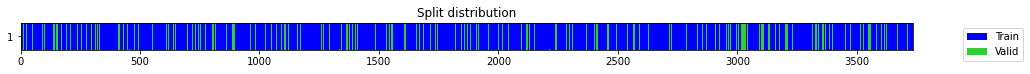

In [85]:
split_indx = 30

print('Processing Volume data..')

def get_day(x):
    return x.day
def get_month(x):
    return x.month    
def get_year(x):
    return x.year    
# def get_ismonthstart(x):
#     return x.is_month_start

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['Signal']
row = ["feature{}".format(x) for x in np.array(range(IMFS_count+4))] #Change this number to higher if necessary!
scalersIN = pd.DataFrame([], columns = col, index = row)
scalersOUT = pd.DataFrame([], columns = col, index = [0])
from sklearn.preprocessing import OrdinalEncoder
#read TS data as datetime
TS =  pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_TSsequences_' + season + '.csv',header=None)
cols = TS.columns[:]
TS[cols] = TS[cols].apply(pd.to_datetime, errors='coerce')
TS_data = TS.iloc[:,:] # Train set 
TS_D = TS_data.applymap(get_day)
TS_Y = TS_data.applymap(get_year)
TS_M = TS_data.applymap(get_month)
# TS_Mstart = TS_data.applymap(get_ismonthstart)

# define ordinal encoding
encoder_H = OrdinalEncoder()
encoder_D = OrdinalEncoder()
encoder_month = OrdinalEncoder()
# encoder_monthstart = OrdinalEncoder()
# transform data
TS_D = to3d(encoder_H.fit_transform(TS_D))
TS_Y = to3d(encoder_D.fit_transform(TS_Y))
TS_M = to3d(encoder_month.fit_transform(TS_M))
# TS_Mstart = to3d(encoder_monthstart.fit_transform(TS_Mstart))

test_targetdata={}
test_predsdata={}

test_targetdata={}
test_predsdata={}

print('splitting data..')
for x in range(IMFS_count+1):   #Initialize
  exec('temp' + str(x) + ' = np.zeros((Vol.shape[0],Vol.shape[1]))')

for x in range(0,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  print('-IMF',x,', splitting data..')
  exec('temp' + str(x) + ' = to3d(VMD_Vol.iloc[x::IMFS_count+1,:].values)')

Vol_data_allIMFs = temp0
for x in range(1,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  exec('Vol_data_allIMFs = np.concatenate((temp' + str(x) + ', Vol_data_allIMFs), axis=1)')

# Temp_data = to3d(Temp.iloc[:,:].values)
data = np.concatenate([Vol_data_allIMFs, TS_D, TS_Y, TS_M],axis=1)  #, TS_Mend, TS_Mstart
data_X = data[:,:,:split_indx]
data_y = Vol.iloc[:,split_indx:]
X_train, X_test = data_X[:TS.shape[0]-int(TS.shape[0]*20/100)], data_X[-int(TS.shape[0]*20/100):]
y_train, y_test = data_y[:TS.shape[0]-int(TS.shape[0]*20/100)], data_y[-int(TS.shape[0]*20/100):]
print('Standardizing data..')
for i in range(X_train.shape[1]): #normalize IN data
  scalersIN['Signal']["feature{}".format(i)] = StandardScaler()
  X_train[:, i, :] = scalersIN['Signal']["feature{}".format(i)].fit_transform(X_train[:, i, :])    
scalersOUT['Signal'] = StandardScaler() #normalize OUT data
y_train = scalersOUT['Signal'][0].fit_transform(y_train)  
print('training set: ',X_train.shape, y_train.shape, ', testing set: ',X_test.shape, y_test.shape)

splits = get_splits(y_train, valid_size=.2, stratify=False, random_state=42, shuffle=True)
tfms  = [None, [ToFloat(), ToNumpyTensor()]]
dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128])    
#**************#**************#**************#**************#**************#**************#**************#**************

#### Model learning

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.952094,0.785120,0.713428,0.886070,00:00
1,0.708757,0.418584,0.542789,0.646981,00:00
2,0.540003,0.248441,0.375903,0.498438,00:00
3,0.426510,0.100451,0.249963,0.316940,00:00
4,0.340242,0.044867,0.143466,0.211819,00:00
5,0.275185,0.047667,0.153693,0.218328,00:00
6,0.226787,0.028758,0.108956,0.169582,00:00
7,0.189359,0.025175,0.087200,0.158667,00:00
8,0.160082,0.023082,0.083274,0.151929,00:00
9,0.136789,0.020895,0.074915,0.144550,00:00


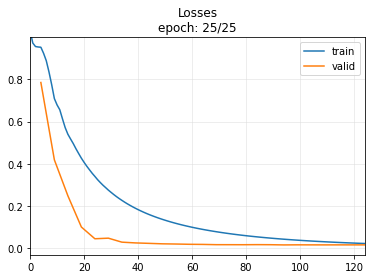

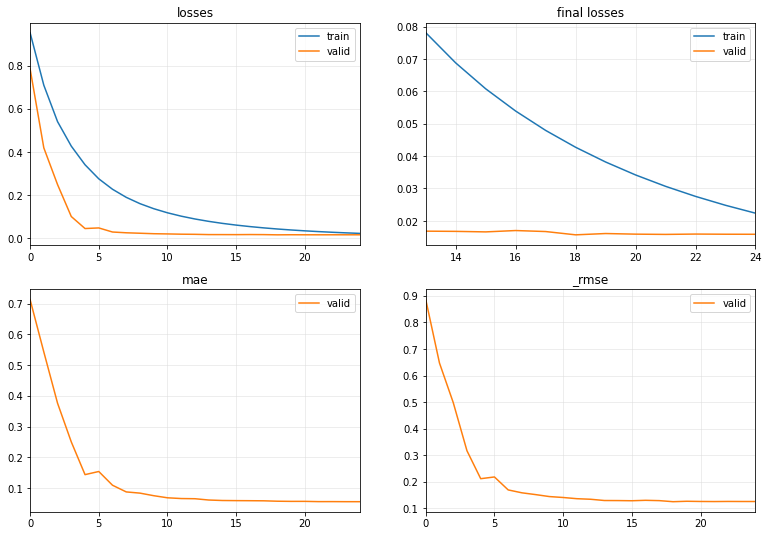

Targets and Predictions shapes (934, 30) (934, 30)
LSTMPlus : MAPE =  3.451507496779646 MAE =  0.4744236802752987 RMSE =  0.9096733201384969


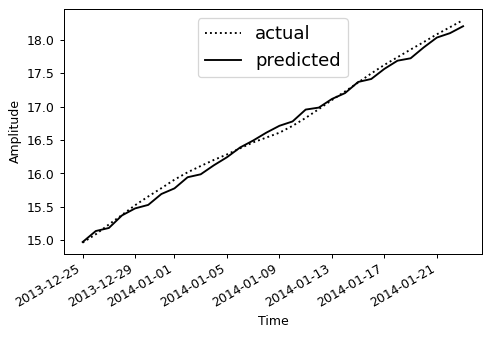

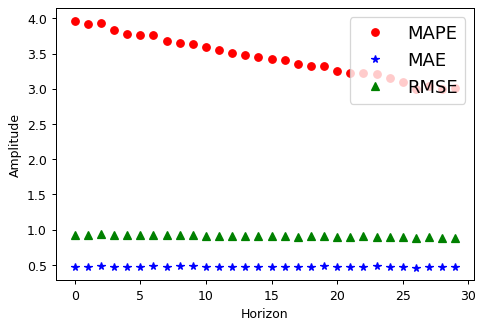

In [86]:
#Model learning
learn = TSForecaster(X_train, y_train, splits=splits, tfms=tfms, bs=512, arch=model_name, arch_config=par, metrics=[mae, rmse], cbs=[ShowGraph(),SaveModel()])
learn.fit_one_cycle(freeze_epoch, learning_rate)
# #save trained model
# learn.save_all(path='/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export', dls_fname='dls', model_fname='WP_TIME_multistep_' + learn.model.__class__.__name__ + '_' + HOUSE, learner_fname='learner')
valid_dl = dls.valid

# Labeled test data
for i in range(X_test.shape[1]): #normalize IN data
  X_test[:, i, :] = scalersIN['Signal']["feature{}".format(i)].transform(X_test[:, i, :])    
y_test = scalersOUT['Signal'][0].transform(y_test)  
test_ds = valid_dl.dataset.add_test(X_test, y_test)
test_dl = valid_dl.new(test_ds)
_, temp_targets, temp_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
#denormalize data
test_predsdata = scalersOUT['Signal'][0].inverse_transform(temp_preds)  
test_targetdata = scalersOUT['Signal'][0].inverse_transform(temp_targets)    
del temp_targets, temp_preds
# RMSE.append(rmse(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# MAE.append(mae(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# print(f'RMSE: {RMSE[x]:10.6f}, MAE: {MAE[x]:10.6f}')
d = pd.DataFrame([])
d = test_targetdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_targetdata_VOLF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', d, delimiter=',')
dp = pd.DataFrame([])
dp = test_predsdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_predsdata_VOLF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', dp, delimiter=',')

#TEST MODEL
import numpy as np
import matplotlib.pyplot as plt
print('Targets and Predictions shapes', d.shape, dp.shape)

MAPE = []
MAE  = []
RMSE = []
for i in range(d.shape[1]): 
  MAPE.append(np.mean(np.abs((d[:,i] - dp[:,i]) / d[:,i]))*100)
  MAE.append(np.mean(np.abs((d[:,i] - dp[:,i]))))
  RMSE.append(np.sqrt(np.mean((d[:,i] - dp[:,i])**2)))
print(learn.model.__class__.__name__,': MAPE = ',np.mean(MAPE), 'MAE = ',np.mean(MAE), 'RMSE = ',np.mean(RMSE))

# Create plots with pre-defined labels.
fig, ax = plt.subplots(dpi = 90)
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], d[0][:], 'k:', label='actual')
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], dp[0][:], 'k-', label='predicted')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper center',fontsize='x-large')

plt.show()

# Create plots with pre-defined labels.
fig_step, ax_step = plt.subplots(dpi = 90)
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAPE, 'ro', label='MAPE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAE, 'b*', label='MAE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),RMSE, 'g^', label='RMSE')
plt.ylabel('Amplitude')
plt.xlabel('Horizon')
legend = ax_step.legend(loc='upper right',fontsize='x-large')

plt.show()


## season2

In [87]:
season = season2
IMFS_count = K_SpringSummer
if hrz == '7d':
  exec('n_layers = 3')
  exec('bias = True')
  exec('rnn_dropout = 0.286473396016963')
  exec('bidirectional = True')
  exec('fc_dropout = 0.158475012329661')
  exec('bn = False')
  exec('learning_rate = 0.00317586666858998')
elif hrz == '1m':
  exec('n_layers = 8')
  exec('bias = True')
  exec('rnn_dropout = 0.302047446421328')
  exec('bidirectional = True')
  exec('fc_dropout = 0.322673019184526')
  exec('bn = True')
  exec('learning_rate = 0.00137707061978508')
par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

### All-in-one strategy

In [88]:
ind = str(IMFS_count) + 'IMFs' #change this!!
mode = 'VolTime_'

Vol = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Volsequences_' + season + '.csv',header=None)
VMD_Vol = pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_Volsequences_' + ind + '_' + season + '.csv')
VMD_Vol = VMD_Vol.drop(columns='Element0')
Vol

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,32.423,32.467,32.517,32.553,32.580,32.603,32.625,32.661,32.701,32.725,...,32.564,32.518,32.471,32.430,32.377,32.327,32.281,32.218,32.165,32.121
1,32.467,32.517,32.553,32.580,32.603,32.625,32.661,32.701,32.725,32.738,...,32.518,32.471,32.430,32.377,32.327,32.281,32.218,32.165,32.121,32.080
2,32.517,32.553,32.580,32.603,32.625,32.661,32.701,32.725,32.738,32.767,...,32.471,32.430,32.377,32.327,32.281,32.218,32.165,32.121,32.080,32.030
3,32.553,32.580,32.603,32.625,32.661,32.701,32.725,32.738,32.767,32.807,...,32.430,32.377,32.327,32.281,32.218,32.165,32.121,32.080,32.030,31.970
4,32.580,32.603,32.625,32.661,32.701,32.725,32.738,32.767,32.807,32.841,...,32.377,32.327,32.281,32.218,32.165,32.121,32.080,32.030,31.970,31.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,23.184,23.132,23.082,23.028,22.987,22.977,22.975,22.946,22.913,22.871,...,16.915,16.723,16.497,16.238,15.980,15.714,15.433,15.187,14.954,14.660
5800,23.132,23.082,23.028,22.987,22.977,22.975,22.946,22.913,22.871,22.809,...,16.723,16.497,16.238,15.980,15.714,15.433,15.187,14.954,14.660,14.330
5801,23.082,23.028,22.987,22.977,22.975,22.946,22.913,22.871,22.809,22.717,...,16.497,16.238,15.980,15.714,15.433,15.187,14.954,14.660,14.330,13.975
5802,23.028,22.987,22.977,22.975,22.946,22.913,22.871,22.809,22.717,22.617,...,16.238,15.980,15.714,15.433,15.187,14.954,14.660,14.330,13.975,13.719


In [89]:
exec('n_layers = 3')
exec('bias = True')
exec('rnn_dropout = 0.286473396016963')
exec('bidirectional = True')
exec('fc_dropout = 0.158475012329661')
exec('bn = False')
exec('learning_rate = 0.00317586666858998')

par = {'n_layers':n_layers, 'bias':bias, 'rnn_dropout':rnn_dropout, 'bidirectional':bidirectional,'fc_dropout':fc_dropout, 'bn':bn}

Processing Volume data..
splitting data..
-IMF 0 , splitting data..
-IMF 1 , splitting data..
-IMF 2 , splitting data..
-IMF 3 , splitting data..
-IMF 4 , splitting data..
-IMF 5 , splitting data..
-IMF 6 , splitting data..
-IMF 7 , splitting data..
-IMF 8 , splitting data..
-IMF 9 , splitting data..
-IMF 10 , splitting data..
-IMF 11 , splitting data..
-IMF 12 , splitting data..
-IMF 13 , splitting data..
-IMF 14 , splitting data..
-IMF 15 , splitting data..
-IMF 16 , splitting data..
-IMF 17 , splitting data..
-IMF 18 , splitting data..
-IMF 19 , splitting data..
-IMF 20 , splitting data..
-IMF 21 , splitting data..
-IMF 22 , splitting data..
-IMF 23 , splitting data..
-IMF 24 , splitting data..
-IMF 25 , splitting data..
-IMF 26 , splitting data..
-IMF 27 , splitting data..
-IMF 28 , splitting data..
-IMF 29 , splitting data..
-IMF 30 , splitting data..
-IMF 31 , splitting data..
Standardizing data..
training set:  (4644, 35, 30) (4644, 30) , testing set:  (1160, 35, 30) (1160, 30)


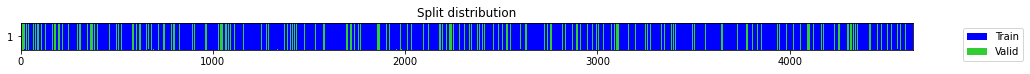

In [90]:
split_indx = 30

print('Processing Volume data..')

def get_day(x):
    return x.day
def get_month(x):
    return x.month    
def get_year(x):
    return x.year    
# def get_ismonthstart(x):
#     return x.is_month_start

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['Signal']
row = ["feature{}".format(x) for x in np.array(range(IMFS_count+4))] #Change this number to higher if necessary!
scalersIN = pd.DataFrame([], columns = col, index = row)
scalersOUT = pd.DataFrame([], columns = col, index = [0])
from sklearn.preprocessing import OrdinalEncoder
#read TS data as datetime
TS =  pd.read_csv('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/ICEF'+ hrz +'_TSsequences_' + season + '.csv',header=None)
cols = TS.columns[:]
TS[cols] = TS[cols].apply(pd.to_datetime, errors='coerce')
TS_data = TS.iloc[:,:] # Train set 
TS_D = TS_data.applymap(get_day)
TS_Y = TS_data.applymap(get_year)
TS_M = TS_data.applymap(get_month)
# TS_Mstart = TS_data.applymap(get_ismonthstart)

# define ordinal encoding
encoder_H = OrdinalEncoder()
encoder_D = OrdinalEncoder()
encoder_month = OrdinalEncoder()
# encoder_monthstart = OrdinalEncoder()
# transform data
TS_D = to3d(encoder_H.fit_transform(TS_D))
TS_Y = to3d(encoder_D.fit_transform(TS_Y))
TS_M = to3d(encoder_month.fit_transform(TS_M))
# TS_Mstart = to3d(encoder_monthstart.fit_transform(TS_Mstart))

test_targetdata={}
test_predsdata={}

test_targetdata={}
test_predsdata={}

print('splitting data..')
for x in range(IMFS_count+1):   #Initialize
  exec('temp' + str(x) + ' = np.zeros((Vol.shape[0],Vol.shape[1]))')

for x in range(0,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  print('-IMF',x,', splitting data..')
  exec('temp' + str(x) + ' = to3d(VMD_Vol.iloc[x::IMFS_count+1,:].values)')

Vol_data_allIMFs = temp0
for x in range(1,IMFS_count+1,1): #Extract then transform to 3D then concatenate
  exec('Vol_data_allIMFs = np.concatenate((temp' + str(x) + ', Vol_data_allIMFs), axis=1)')

# Temp_data = to3d(Temp.iloc[:,:].values)
data = np.concatenate([Vol_data_allIMFs, TS_D, TS_Y, TS_M],axis=1)  #, TS_Mend, TS_Mstart
data_X = data[:,:,:split_indx]
data_y = Vol.iloc[:,split_indx:]
X_train, X_test = data_X[:TS.shape[0]-int(TS.shape[0]*20/100)], data_X[-int(TS.shape[0]*20/100):]
y_train, y_test = data_y[:TS.shape[0]-int(TS.shape[0]*20/100)], data_y[-int(TS.shape[0]*20/100):]
print('Standardizing data..')
for i in range(X_train.shape[1]): #normalize IN data
  scalersIN['Signal']["feature{}".format(i)] = StandardScaler()
  X_train[:, i, :] = scalersIN['Signal']["feature{}".format(i)].fit_transform(X_train[:, i, :])    
scalersOUT['Signal'] = StandardScaler() #normalize OUT data
y_train = scalersOUT['Signal'][0].fit_transform(y_train)  
print('training set: ',X_train.shape, y_train.shape, ', testing set: ',X_test.shape, y_test.shape)

splits = get_splits(y_train, valid_size=.2, stratify=False, random_state=42, shuffle=True)
tfms  = [None, [ToFloat(), ToNumpyTensor()]]
dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128])    
#**************#**************#**************#**************#**************#**************#**************#**************

#### Model learning

epoch,train_loss,valid_loss,mae,_rmse,time
0,0.809611,0.414028,0.522236,0.643450,00:00
1,0.520355,0.143703,0.316671,0.379082,00:00
2,0.368698,0.050376,0.183389,0.224446,00:00
3,0.274800,0.032741,0.143386,0.180944,00:00
4,0.211289,0.025533,0.124358,0.159790,00:00
5,0.166385,0.015339,0.098175,0.123852,00:00
6,0.133515,0.006789,0.063090,0.082396,00:00
7,0.108753,0.005240,0.054397,0.072390,00:00
8,0.089625,0.003811,0.045702,0.061732,00:00
9,0.074618,0.003973,0.046213,0.063031,00:00


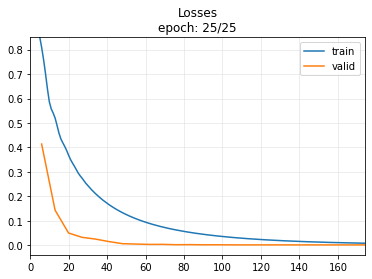

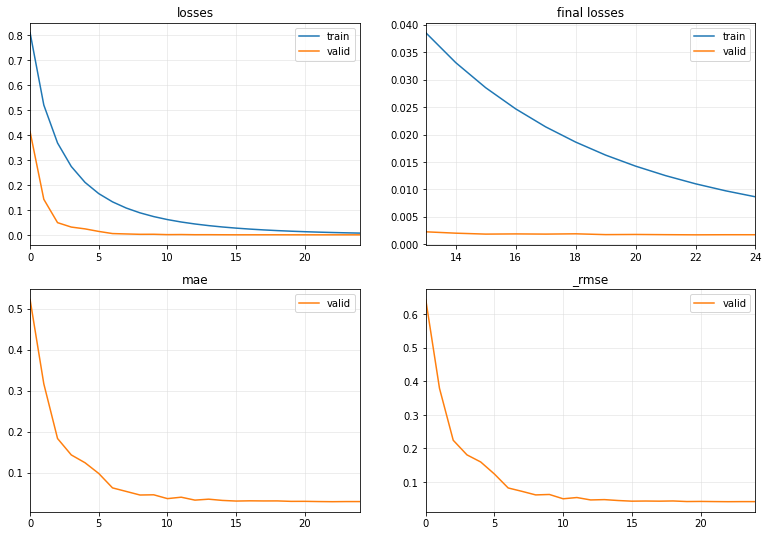

Targets and Predictions shapes (1160, 30) (1160, 30)
LSTMPlus : MAPE =  5.174523991586217 MAE =  0.4156438278402074 RMSE =  0.5271346208034223


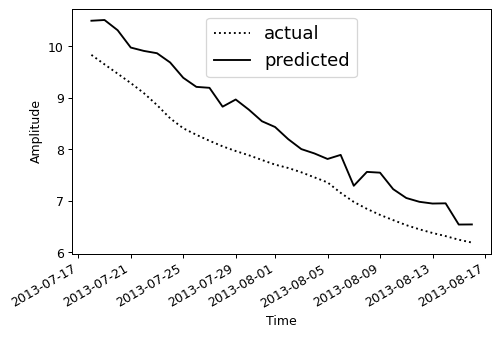

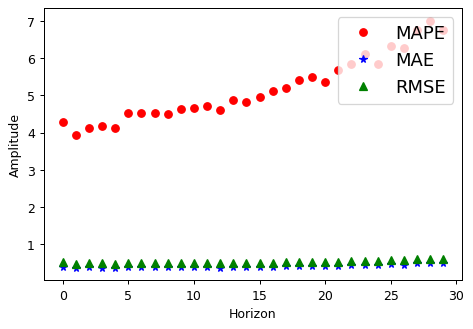

In [91]:
#Model learning
learn = TSForecaster(X_train, y_train, splits=splits, tfms=tfms, bs=512, arch=model_name, arch_config=par, metrics=[mae, rmse], cbs=[ShowGraph(),SaveModel()])
learn.fit_one_cycle(freeze_epoch, learning_rate)
# #save trained model
# learn.save_all(path='/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export', dls_fname='dls', model_fname='WP_TIME_multistep_' + learn.model.__class__.__name__ + '_' + HOUSE, learner_fname='learner')
valid_dl = dls.valid

# Labeled test data
for i in range(X_test.shape[1]): #normalize IN data
  X_test[:, i, :] = scalersIN['Signal']["feature{}".format(i)].transform(X_test[:, i, :])    
y_test = scalersOUT['Signal'][0].transform(y_test)  
test_ds = valid_dl.dataset.add_test(X_test, y_test)
test_dl = valid_dl.new(test_ds)
_, temp_targets, temp_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
#denormalize data
test_predsdata = scalersOUT['Signal'][0].inverse_transform(temp_preds)  
test_targetdata = scalersOUT['Signal'][0].inverse_transform(temp_targets)    
del temp_targets, temp_preds
# RMSE.append(rmse(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# MAE.append(mae(test_targetdata["test_targets"+str(x)].data, test_predsdata["test_preds"+str(x)].data))
# print(f'RMSE: {RMSE[x]:10.6f}, MAE: {MAE[x]:10.6f}')
d = pd.DataFrame([])
d = test_targetdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_targetdata_VOLF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', d, delimiter=',')
dp = pd.DataFrame([])
dp = test_predsdata
np.savetxt('/content/gdrive/MyDrive/ARCTICseaForecasting/PIOMAS/export/test_predsdata_VOLF'+ hrz +'_' + mode + model_name.__name__ + ind + '_' + season + strategy + '.csv', dp, delimiter=',')

#TEST MODEL
import numpy as np
import matplotlib.pyplot as plt
print('Targets and Predictions shapes', d.shape, dp.shape)

MAPE = []
MAE  = []
RMSE = []
for i in range(d.shape[1]): 
  MAPE.append(np.mean(np.abs((d[:,i] - dp[:,i]) / d[:,i]))*100)
  MAE.append(np.mean(np.abs((d[:,i] - dp[:,i]))))
  RMSE.append(np.sqrt(np.mean((d[:,i] - dp[:,i])**2)))
print(learn.model.__class__.__name__,': MAPE = ',np.mean(MAPE), 'MAE = ',np.mean(MAE), 'RMSE = ',np.mean(RMSE))

# Create plots with pre-defined labels.
fig, ax = plt.subplots(dpi = 90)
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], d[0][:], 'k:', label='actual')
ax.plot_date(TS.iloc[TS.shape[0]-int(TS.shape[0]*20/100), split_indx:], dp[0][:], 'k-', label='predicted')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.gcf().autofmt_xdate()
legend = ax.legend(loc='upper center',fontsize='x-large')

plt.show()

# Create plots with pre-defined labels.
fig_step, ax_step = plt.subplots(dpi = 90)
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAPE, 'ro', label='MAPE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),MAE, 'b*', label='MAE')
ax_step.plot(np.array(range(TS.shape[1] - split_indx)),RMSE, 'g^', label='RMSE')
plt.ylabel('Amplitude')
plt.xlabel('Horizon')
legend = ax_step.legend(loc='upper right',fontsize='x-large')

plt.show()
